In [1]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import  DataLoader
from torch.optim import Adam

import pipeline
import model as m

c:\Users\Aina Tur\miniconda3\envs\feina\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# SETTINGS

In [2]:
use_cuda = True
torch.manual_seed(33)

if use_cuda:
    device = torch.device("cuda:1")
else:
    device = torch.device("cpu")

# LOSS

In [3]:
mseLoss = nn.MSELoss()
maeLoss = nn.L1Loss()
bceLoss = nn.BCELoss()

# DATA 32 x 32 

In [4]:
training_set, test_set= pipeline.data_download("imagenet", False)
print(torch.min(training_set[0][0]))
print(torch.max(training_set[0][0]))
train_dl, test_dl = pipeline.dataloaders(training_set, test_set)

tensor(-2.1179)
tensor(2.3936)


In [5]:
training_set1, test_set1 = pipeline.data_download("transform", False)
print(torch.min(training_set1[0][0]))
print(torch.max(training_set1[0][0]))
train_dl1, test_dl1 = pipeline.dataloaders(training_set1, test_set1)

tensor(0.)
tensor(1.)


In [6]:
training_set2, test_set2 = pipeline.data_download("menys1", False)
print(torch.min(training_set2[0][0]))
print(torch.max(training_set2[0][0]))
train_dl2, test_dl2= pipeline.dataloaders(training_set2, test_set2)

tensor(-1.)
tensor(1.)


# DATA 224 x 224 

In [7]:
training_setResize, test_setResized= pipeline.data_download("imagenet", True)
print(torch.min(training_setResize[0][0]))
print(torch.max(training_setResize[0][0]))
train_dl3, test_dl3 = pipeline.dataloaders(training_setResize, test_setResized)

tensor(-2.1179)
tensor(2.3936)


In [8]:
training_setResize2, test_setResized2 = pipeline.data_download("transform", True)
print(torch.min(training_setResize2[0][0]))
print(torch.max(test_setResized2[0][0]))
train_dl4, test_dl4 = pipeline.dataloaders(training_setResize2, test_setResized2)

tensor(0.)
tensor(1.)


In [9]:
training_setResized3, test_setResized3 = pipeline.data_download("menys1", False)
print(torch.min(training_setResized3[0][0]))
print(torch.max(training_setResized3[0][0]))
train_dl5, test_dl5= pipeline.dataloaders(training_setResized3, test_setResized3)

tensor(-1.)
tensor(1.)


# BLOQUE 1 - SALIDA ENCODER [64,16,16]

- SIN CAPA DE ACTIVACIÓN 
- DATOS NORMALIZADOS CON IMAGENET 
- TAMAÑO 32 X 32
- PERDIDA MSE 

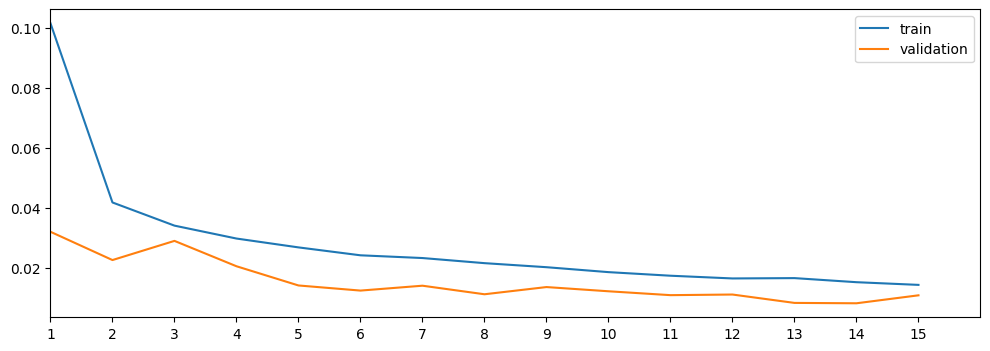

Epoch:15 Training Loss:0.014278404876683633 Validation Loss:0.010796668491782858: 100%|██████████| 15/15 [03:29<00:00, 13.98s/it]


In [11]:
model = m.AutoEncoder("1",None).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block1/block1_32x32SIN.pt",train_dl,test_dl, model, device)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8952821..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9715111..2.5658183].


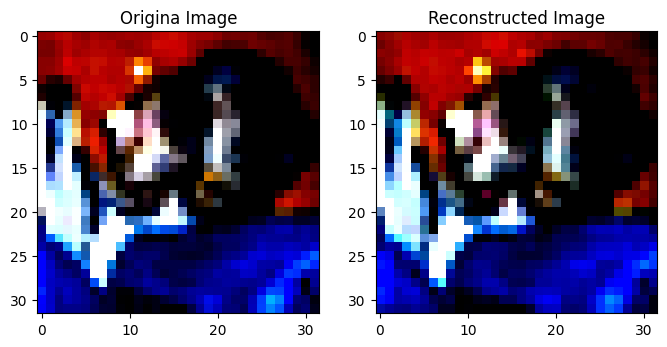

MSE: tensor(0.0108, device='cuda:1')
MAE: tensor(0.0788, device='cuda:1')


In [12]:
pipeline.showImages(test_dl, model,device)
pipeline.calculate_metrics(model, test_dl,device)

- capa de activación tahn 
- DATOS NORMALIZADOS CON IMAGENET 
- TAMAÑO 32 X 32
- PERDIDA mseloss

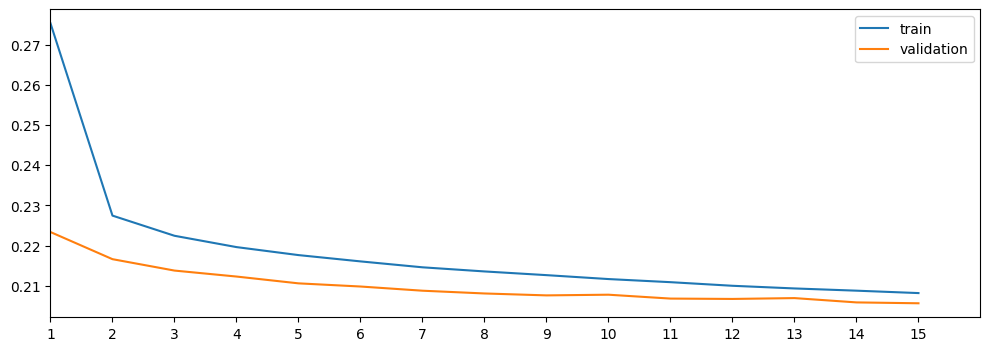

Epoch:15 Training Loss:0.20815208114473563 Validation Loss:0.20561242444270375: 100%|██████████| 15/15 [03:35<00:00, 14.37s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8952821..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9998886..0.9999982].
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x0000021AE9AABC70>
Traceback (most recent call last):
  File "c:\Users\Aina Tur\miniconda3\envs\feina\lib\site-packages\torch\utils\data\dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "c:\Users\Aina Tur\miniconda3\envs\feina\lib\site-packages\torch\utils\data\dataloader.py", line 1576, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


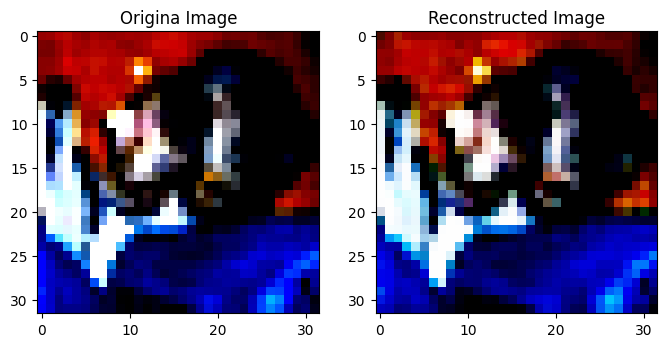

MSE: tensor(0.2056, device='cuda:1')
MAE: tensor(0.2738, device='cuda:1')


In [14]:
model = m.AutoEncoder("1",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block1/block1_32x32Tahn.pt",train_dl,test_dl, model, device)
pipeline.showImages(test_dl, model,device)
pipeline.calculate_metrics(model, test_dl,device)

- capa de activación tahn 
- DATOS NORMALIZADOS CON IMAGENET 
- TAMAÑO 32 X 32
- PERDIDA maeloss

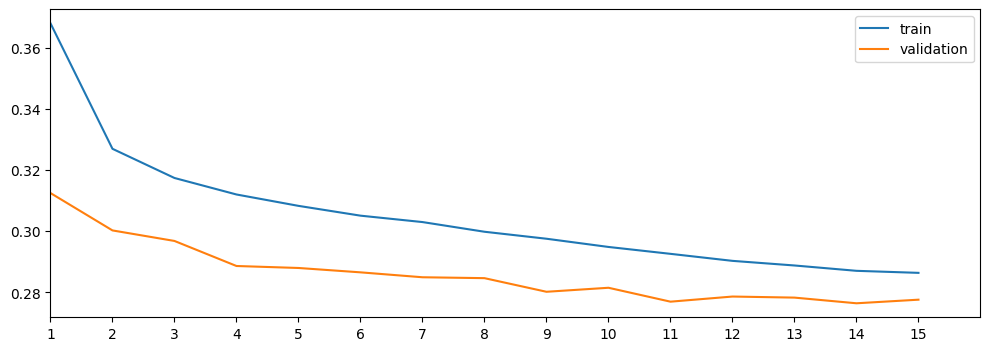

Epoch:15 Training Loss:0.2863647372388668 Validation Loss:0.277584330431525: 100%|██████████| 15/15 [03:24<00:00, 13.62s/it] 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8952821..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9997438..0.9999972].


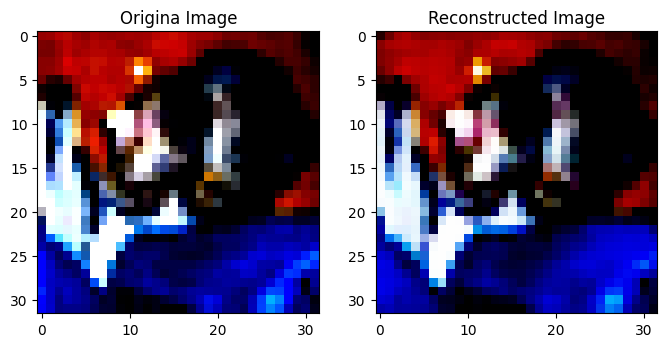

MSE: tensor(0.2067, device='cuda:1')
MAE: tensor(0.2776, device='cuda:1')


In [15]:
model = m.AutoEncoder("1",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, maeLoss, "./modelos/block1/block1_32x32TahnMae.pt",train_dl,test_dl, model, device)
pipeline.showImages(test_dl, model,device)
pipeline.calculate_metrics(model, test_dl,device)

- capa de activación tahn 
- DATOS NORMALIZADOS -1,1
- TAMAÑO 32 X 32
- PERDIDA mseloss

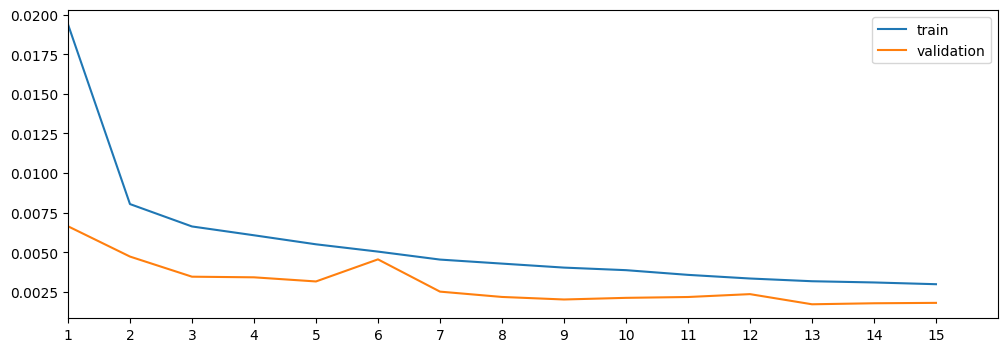

Epoch:15 Training Loss:0.002980130428018693 Validation Loss:0.0018020479732529559: 100%|██████████| 15/15 [03:25<00:00, 13.73s/it] 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8980392..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.81276155..0.9379369].


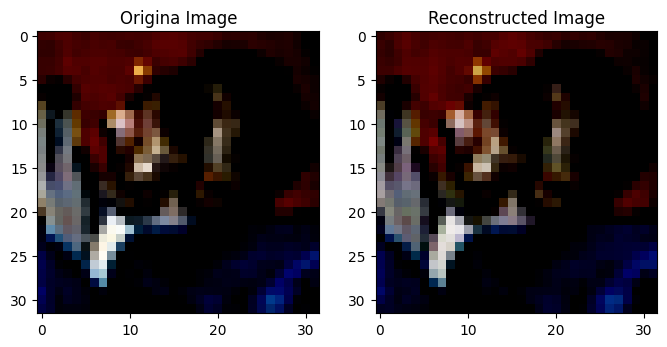

MSE: tensor(0.0018, device='cuda:1')
MAE: tensor(0.0319, device='cuda:1')


In [16]:
model = m.AutoEncoder("1",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block1/block1_32x32menys1.pt",train_dl2,test_dl2, model, device)
pipeline.showImages(test_dl2, model,device)
pipeline.calculate_metrics(model, test_dl2,device)

- capa de activación tahn 
- DATOS NORMALIZADOS -1,1
- TAMAÑO 32 X 32
- PERDIDA maeloss

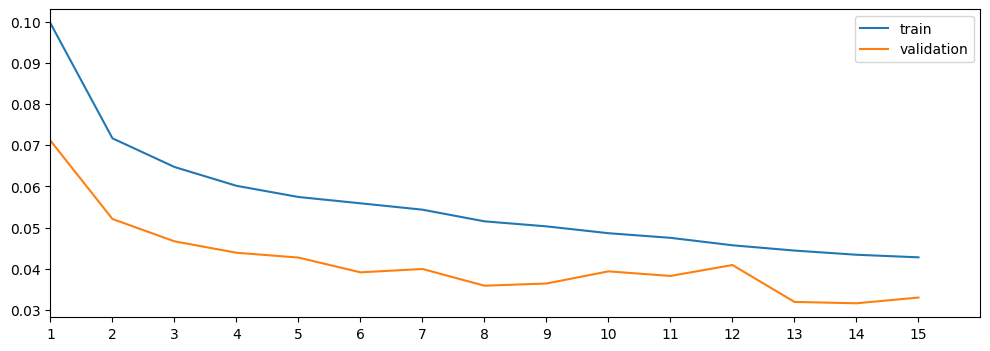

Epoch:15 Training Loss:0.04276847026585174 Validation Loss:0.03299891577008693: 100%|██████████| 15/15 [03:38<00:00, 14.59s/it] 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8980392..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.82598263..0.9133118].


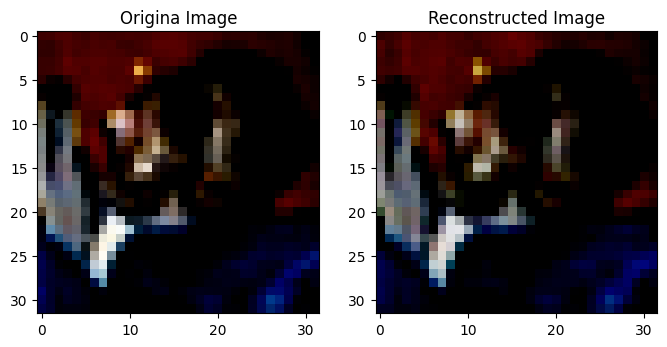

MSE: tensor(0.0020, device='cuda:1')
MAE: tensor(0.0330, device='cuda:1')


In [17]:
model = m.AutoEncoder("1",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, maeLoss, "./modelos/block1/block1_32x32menys1MAE.pt",train_dl2,test_dl2, model, device)
pipeline.showImages(test_dl2, model,device)
pipeline.calculate_metrics(model, test_dl2,device)

- capa de activación sigmoide
- DATOS NORMALIZADOS 0,1
- TAMAÑO 32 X 32
- PERDIDA mseloss

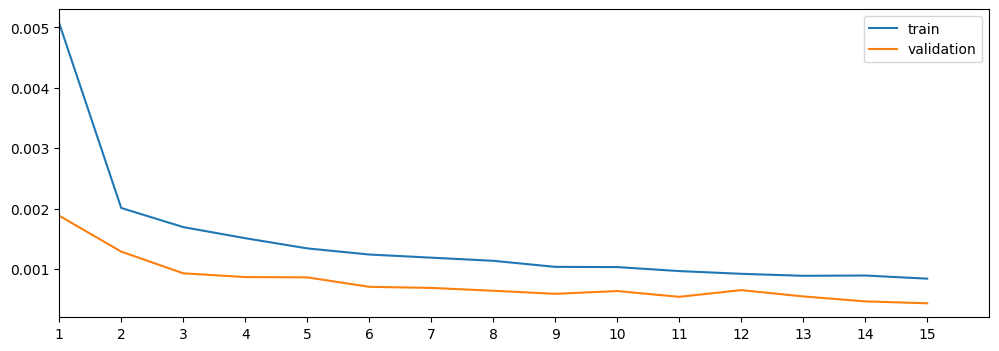

Epoch:15 Training Loss:0.0008424719893598418 Validation Loss:0.0004354451056147438: 100%|██████████| 15/15 [03:26<00:00, 13.75s/it] 


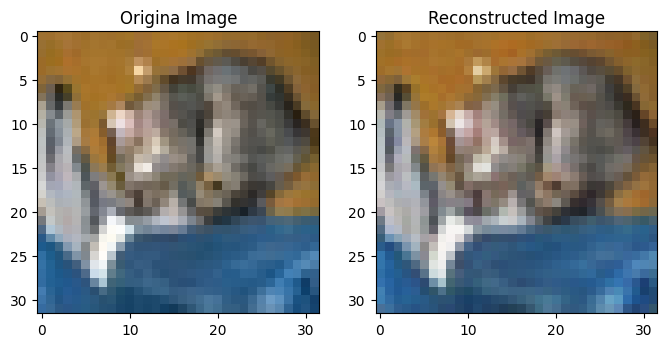

MSE: tensor(0.0004, device='cuda:1')
MAE: tensor(0.0153, device='cuda:1')


In [18]:
model = m.AutoEncoder("1",nn.Sigmoid()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block1/block1_32x32Sigmoide.pt",train_dl1,test_dl1, model, device)
pipeline.showImages(test_dl1, model,device)
pipeline.calculate_metrics(model, test_dl1,device)

- capa de activación sigmoide
- DATOS NORMALIZADOS 0,1
- TAMAÑO 32 X 32
- PERDIDA BCeloss

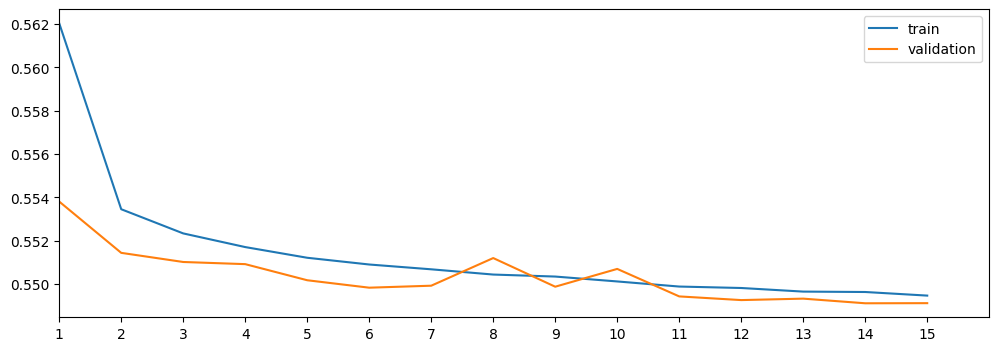

Epoch:15 Training Loss:0.5494672023363291 Validation Loss:0.5491181837207731: 100%|██████████| 15/15 [03:29<00:00, 13.94s/it]


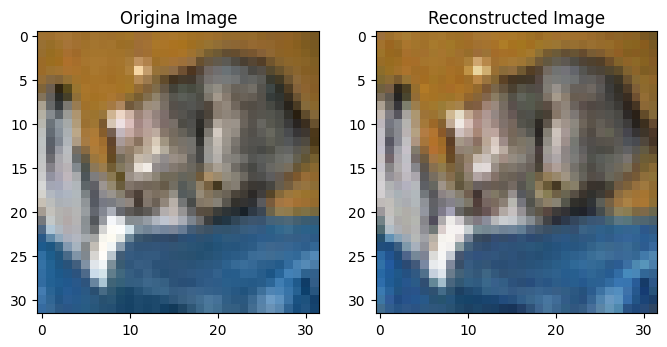

MSE: tensor(0.0005, device='cuda:1')
MAE: tensor(0.0162, device='cuda:1')


In [22]:
model = m.AutoEncoder("1",nn.Sigmoid()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, bceLoss, "./modelos/block1/block1_32x32SigmoideBCE.pt",train_dl1,test_dl1, model, device)
pipeline.showImages(test_dl1, model,device)
pipeline.calculate_metrics(model, test_dl1,device)

# BLOQUE1- 224X224 [64,112,112]

- SIN CAPA DE ACTIVACIÓN 
- DATOS NORMALIZADOS CON IMAGENET 
- TAMAÑO 224x224
- PERDIDA MSE 

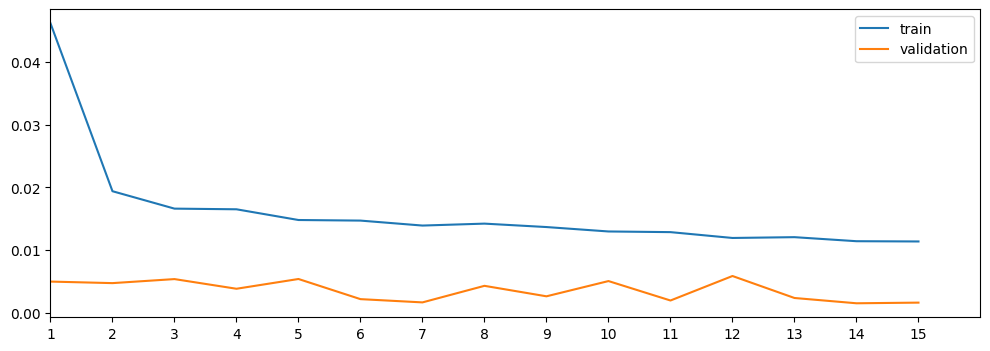

Epoch:15 Training Loss:0.011365004856992529 Validation Loss:0.0016040440180689387: 100%|██████████| 15/15 [27:35<00:00, 110.39s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8952821..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9655027..2.4996798].


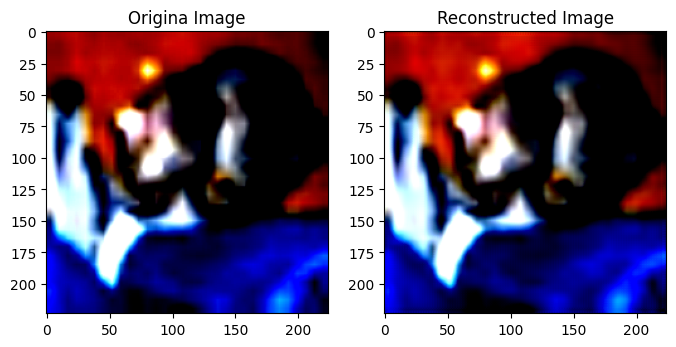

MSE: tensor(0.0016, device='cuda:1')
MAE: tensor(0.0302, device='cuda:1')


In [23]:
model = m.AutoEncoder("1",None).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block1/block1_224x224SIN.pt",train_dl3,test_dl3, model, device)
pipeline.showImages(test_dl3, model,device)
pipeline.calculate_metrics(model, test_dl3,device)

- capa de activación tahn 
- DATOS NORMALIZADOS CON IMAGENET 
- PERDIDA mseloss

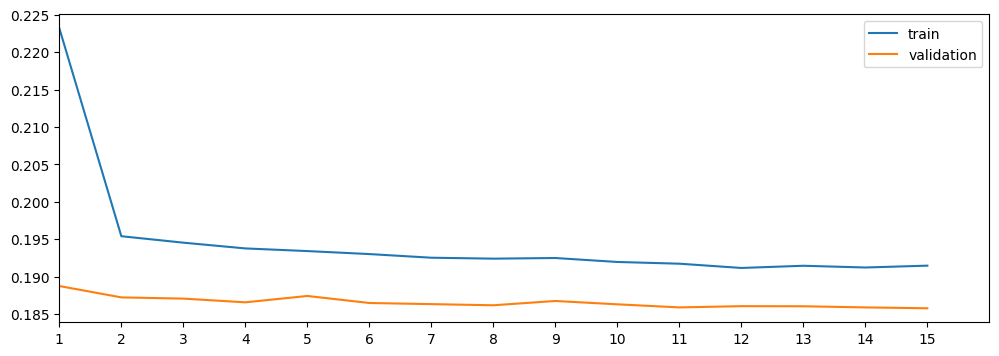

Epoch:15 Training Loss:0.19145980200226892 Validation Loss:0.18576380274798918: 100%|██████████| 15/15 [27:34<00:00, 110.27s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8952821..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999982..1.0].


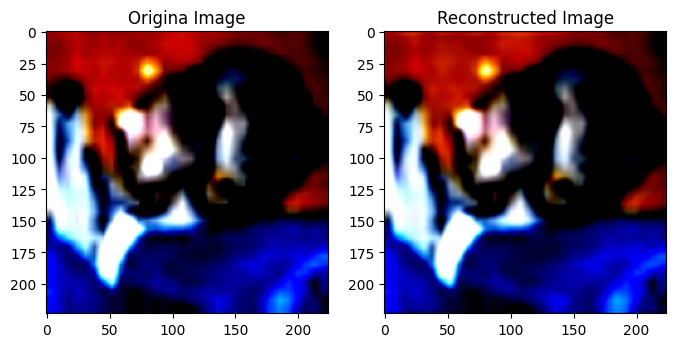

MSE: tensor(0.1858, device='cuda:1')
MAE: tensor(0.2318, device='cuda:1')


In [24]:
model = m.AutoEncoder("1",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block1/block1_224X224Tahn.pt",train_dl3,test_dl3, model, device)
pipeline.showImages(test_dl3, model,device)
pipeline.calculate_metrics(model, test_dl3,device)

- capa de activación tahn 
- DATOS NORMALIZADOS CON IMAGENET 
- PERDIDA mAeloss

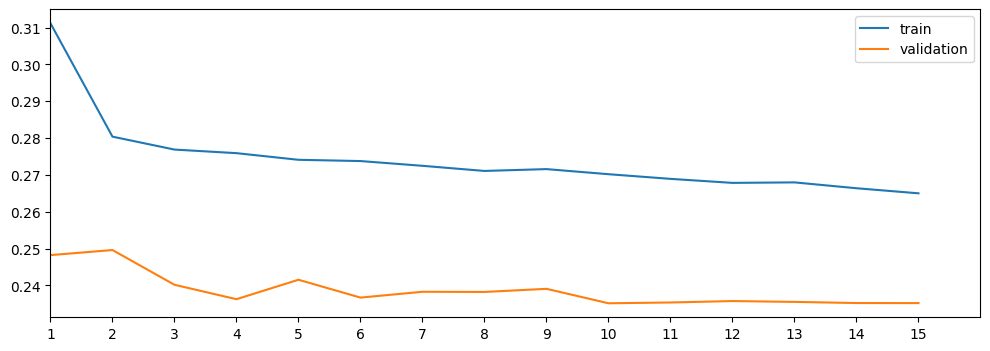

Epoch:15 Training Loss:0.2649897914323967 Validation Loss:0.23517113347639745: 100%|██████████| 15/15 [27:37<00:00, 110.48s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8952821..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99999964..1.0].


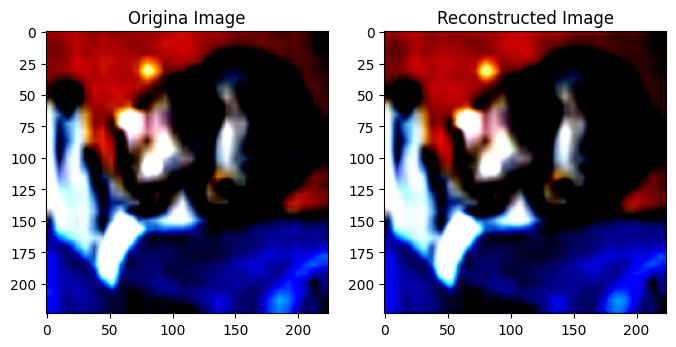

MSE: tensor(0.1862, device='cuda:1')
MAE: tensor(0.2352, device='cuda:1')


In [25]:
model = m.AutoEncoder("1",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, maeLoss, "./modelos/block1/block1_224X224TahnMae.pt",train_dl3,test_dl3, model, device)
pipeline.showImages(test_dl3, model,device)
pipeline.calculate_metrics(model, test_dl3,device)

- capa de activación tahn 
- DATOS NORMALIZADOS -1,1
- PERDIDA mSeloss

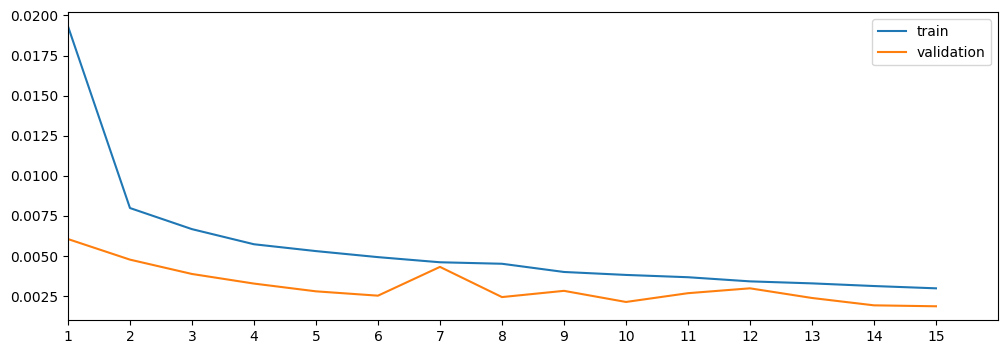

Epoch:15 Training Loss:0.0029865159586364718 Validation Loss:0.001867081485814352: 100%|██████████| 15/15 [03:23<00:00, 13.59s/it] 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8980392..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.82092047..0.9562061].


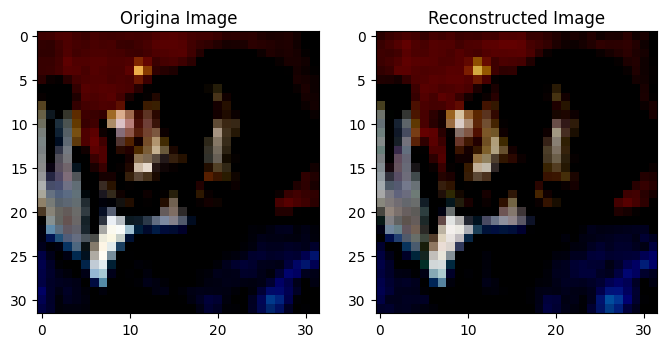

MSE: tensor(0.0019, device='cuda:1')
MAE: tensor(0.0321, device='cuda:1')


In [26]:
model = m.AutoEncoder("1",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block1/block1_224X224menys1.pt",train_dl5,test_dl5, model, device)
pipeline.showImages(test_dl5, model,device)
pipeline.calculate_metrics(model, test_dl5,device)

- capa de activación tahn 
- DATOS NORMALIZADOS -1,1
- PERDIDA maeloss

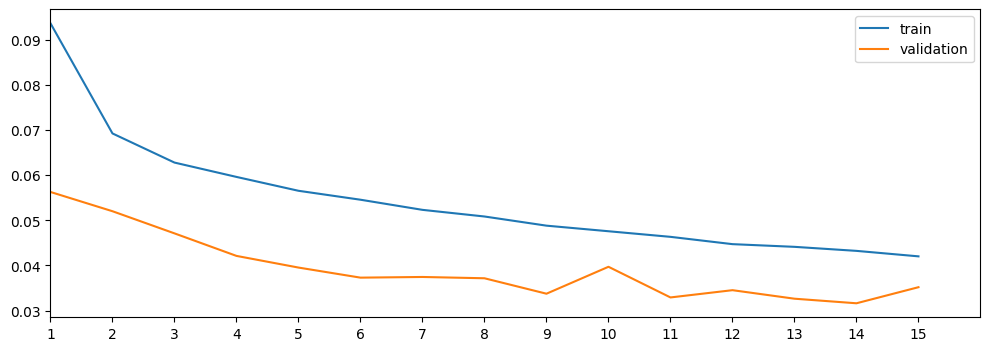

Epoch:15 Training Loss:0.042021955084670215 Validation Loss:0.035195707593453876: 100%|██████████| 15/15 [03:25<00:00, 13.71s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8980392..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8340963..0.95310307].


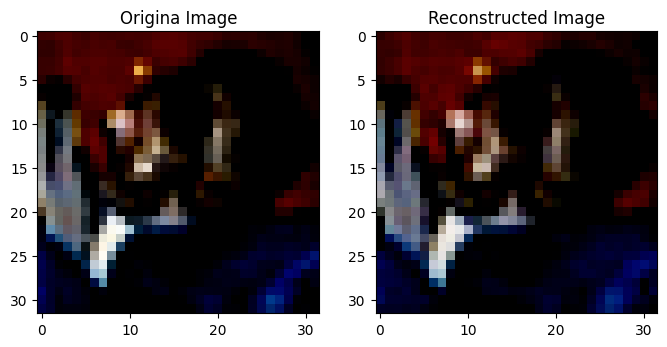

MSE: tensor(0.0022, device='cuda:1')
MAE: tensor(0.0352, device='cuda:1')


In [27]:
model = m.AutoEncoder("1",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, maeLoss, "./modelos/block1/block1_224X224menys1MAE.pt",train_dl5,test_dl5, model, device)
pipeline.showImages(test_dl5, model,device)
pipeline.calculate_metrics(model, test_dl5,device)

- capa de activación sigmoide
- DATOS NORMALIZADOS 0,1
- TAMAÑO 224 X 224
- PERDIDA MSEloss

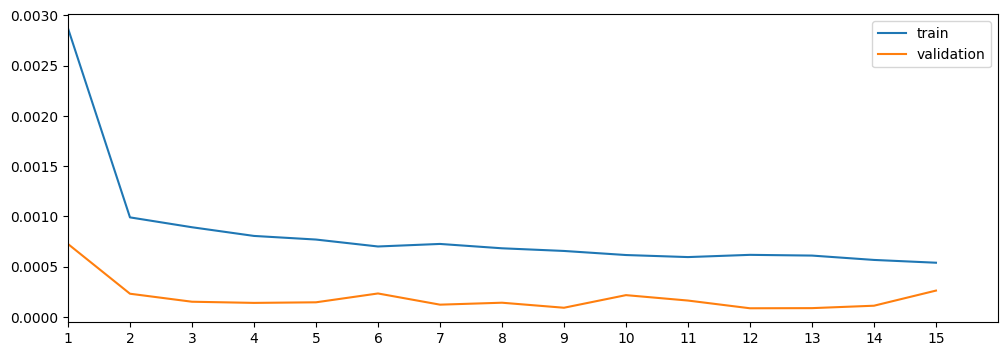

Epoch:15 Training Loss:0.0005399059176891744 Validation Loss:0.00026283172884086114: 100%|██████████| 15/15 [27:34<00:00, 110.31s/it]


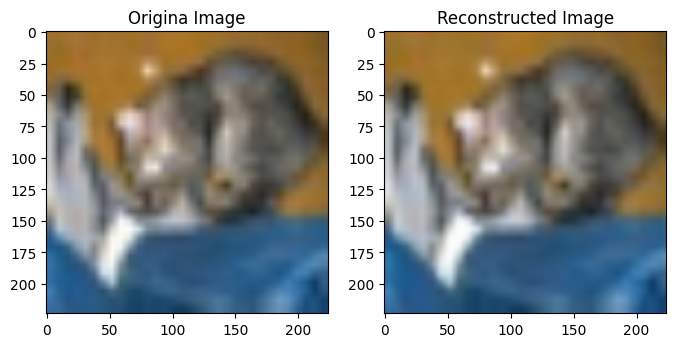

MSE: tensor(0.0003, device='cuda:1')
MAE: tensor(0.0116, device='cuda:1')


In [28]:
model = m.AutoEncoder("1",nn.Sigmoid()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block1/block1_224X224Sigmoide.pt",train_dl4,test_dl4, model, device)
pipeline.showImages(test_dl4, model,device)
pipeline.calculate_metrics(model, test_dl4,device)

- capa de activación sigmoide
- DATOS NORMALIZADOS 0,1
- TAMAÑO 224 X 224
- PERDIDA BCeloss

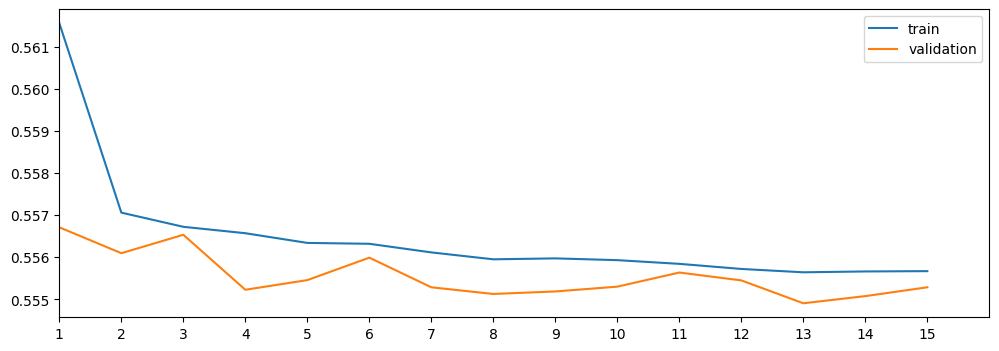

Epoch:15 Training Loss:0.5556697920188263 Validation Loss:0.5552857673686483: 100%|██████████| 15/15 [27:34<00:00, 110.29s/it]


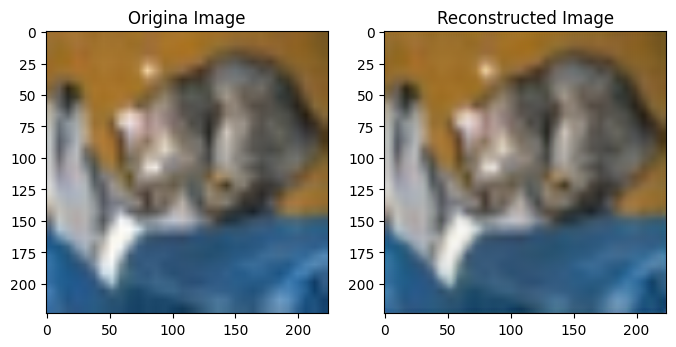

MSE: tensor(0.0002, device='cuda:1')
MAE: tensor(0.0098, device='cuda:1')


In [29]:
model = m.AutoEncoder("1",nn.Sigmoid()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, bceLoss, "./modelos/block1/block1_224X224SigmoideBCE.pt",train_dl4,test_dl4, model, device)
pipeline.showImages(test_dl4, model,device)
pipeline.calculate_metrics(model, test_dl4,device)

# BLOQUE 2 - SALIDA ENCODER [128,8,8]

- sin
- DATOS NORMALIZADOS IMAGENET
- TAMAÑO 32 X 32
- PERDIDA MSEloss

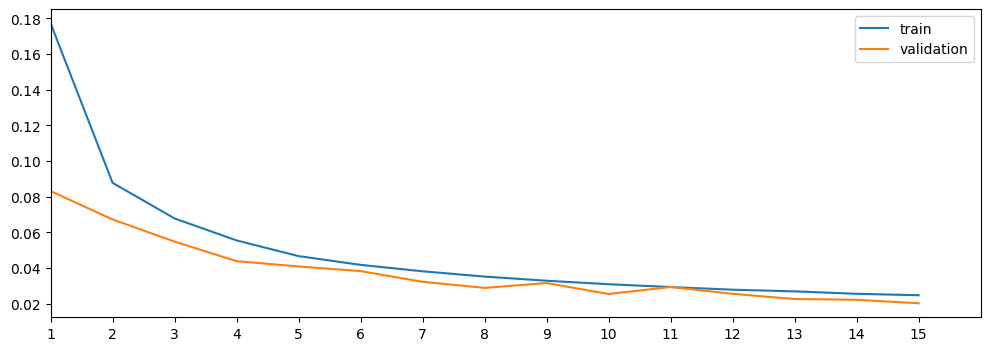

Epoch:15 Training Loss:0.024759014199102935 Validation Loss:0.02024444470508792: 100%|██████████| 15/15 [03:49<00:00, 15.31s/it] 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8952821..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8219999..2.7953825].


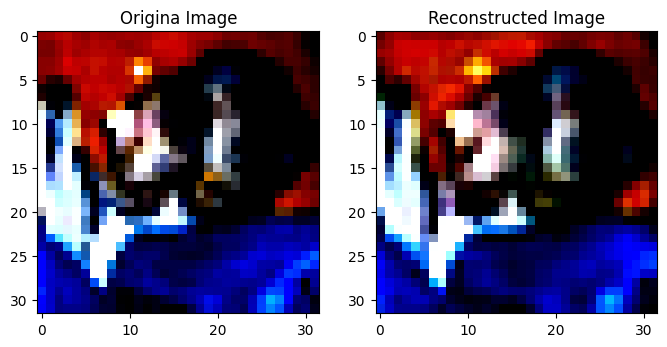

MSE: tensor(0.0202, device='cuda:1')
MAE: tensor(0.1010, device='cuda:1')


In [11]:
model = m.AutoEncoder("2", None).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block2/block2_32x32SIN.pt",train_dl,test_dl, model, device)
pipeline.showImages(test_dl, model,device)
pipeline.calculate_metrics(model, test_dl,device)

- tahn
- DATOS NORMALIZADOS IMAGENET
- TAMAÑO 32 X 32
- PERDIDA MSEloss

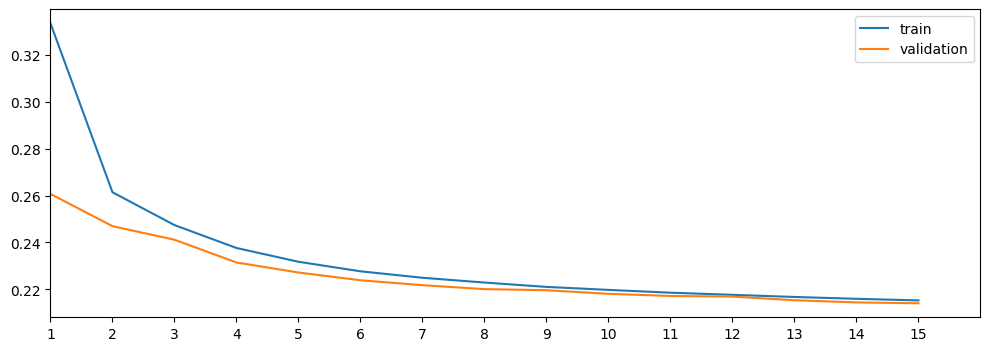

Epoch:15 Training Loss:0.21525865195662086 Validation Loss:0.21403543486900772: 100%|██████████| 15/15 [03:50<00:00, 15.36s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8952821..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9998886..0.99999994].


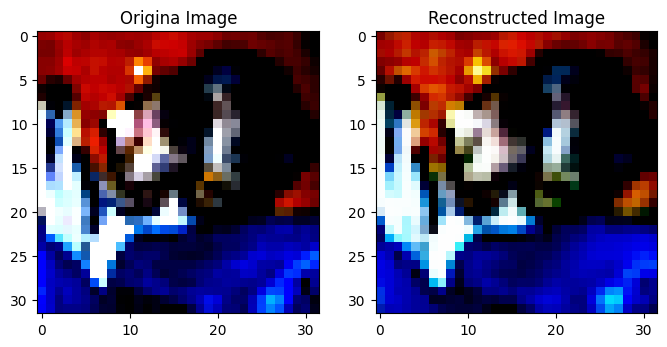

MSE: tensor(0.2140, device='cuda:1')
MAE: tensor(0.2966, device='cuda:1')


In [12]:
model = m.AutoEncoder("2",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block2/block2_32x32tanh.pt",train_dl,test_dl, model, device)
pipeline.showImages(test_dl, model,device)
pipeline.calculate_metrics(model, test_dl,device)

- tahn
- DATOS NORMALIZADOS IMAGENET
- TAMAÑO 32 X 32
- PERDIDA Maeloss

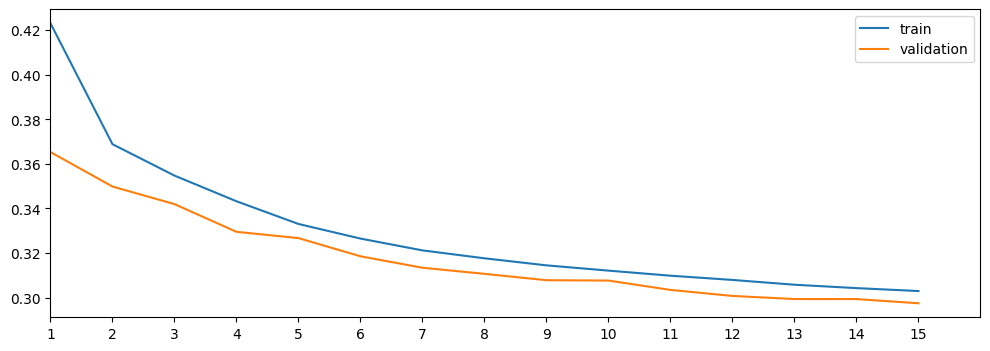

Epoch:15 Training Loss:0.30292190269002245 Validation Loss:0.2974346225586967: 100%|██████████| 15/15 [03:51<00:00, 15.42s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8952821..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99962336..0.9999953].


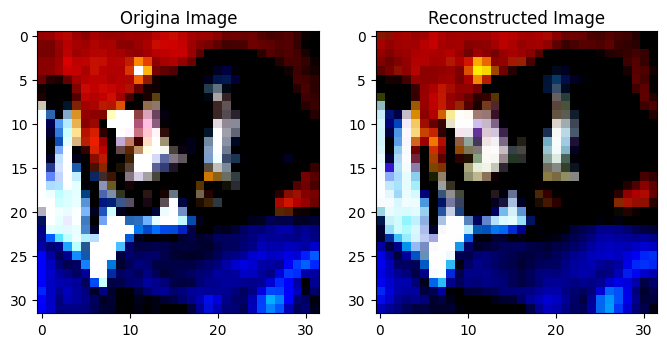

MSE: tensor(0.2151, device='cuda:1')
MAE: tensor(0.2974, device='cuda:1')


In [13]:
model = m.AutoEncoder("2",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, maeLoss, "./modelos/block2/block2_32x32tanhMAE.pt",train_dl,test_dl, model, device)
pipeline.showImages(test_dl, model,device)
pipeline.calculate_metrics(model, test_dl,device)

- tahn
- DATOS NORMALIZADOS -1,1
- TAMAÑO 32 X 32
- PERDIDA Mseloss

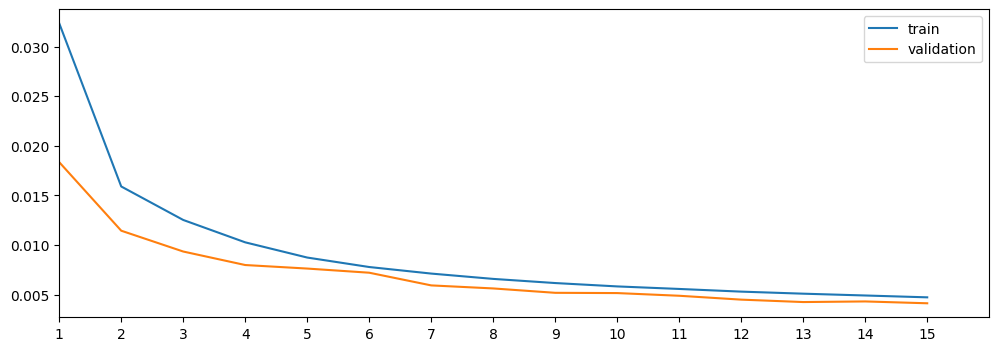

Epoch:15 Training Loss:0.004732684756477766 Validation Loss:0.004134255309897786: 100%|██████████| 15/15 [03:48<00:00, 15.25s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8980392..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8035381..0.92564714].


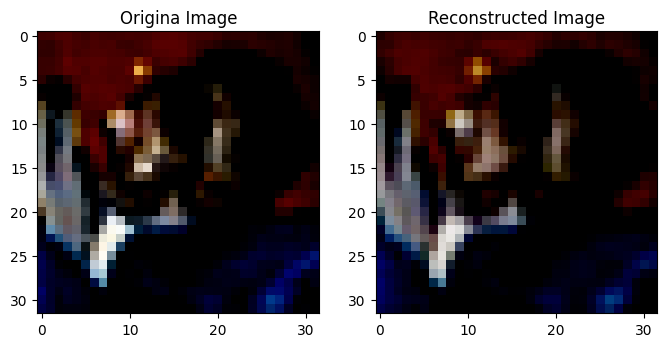

MSE: tensor(0.0041, device='cuda:1')
MAE: tensor(0.0460, device='cuda:1')


In [14]:
model = m.AutoEncoder("2",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block2/block2_32x32menys1.pt",train_dl2,test_dl2, model, device)
pipeline.showImages(test_dl2, model,device)
pipeline.calculate_metrics(model, test_dl2,device)

- tahn
- DATOS NORMALIZADOS -1,1
- TAMAÑO 32 X 32
- PERDIDA Maeloss

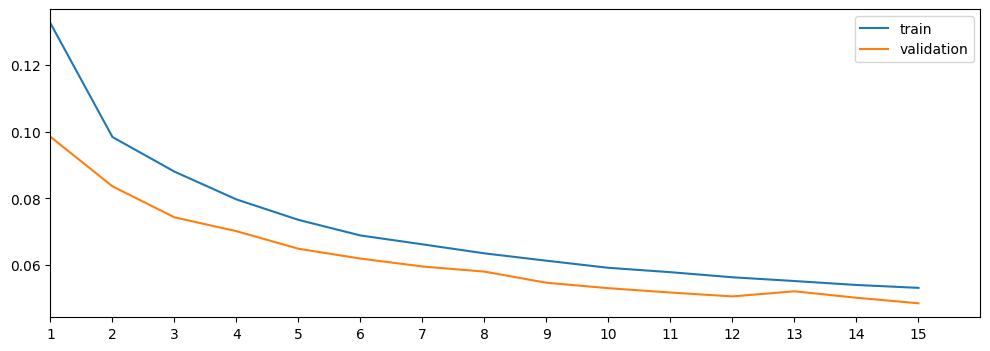

Epoch:15 Training Loss:0.053129358911002976 Validation Loss:0.048502677830977774: 100%|██████████| 15/15 [03:50<00:00, 15.38s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8980392..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7994636..0.95103484].


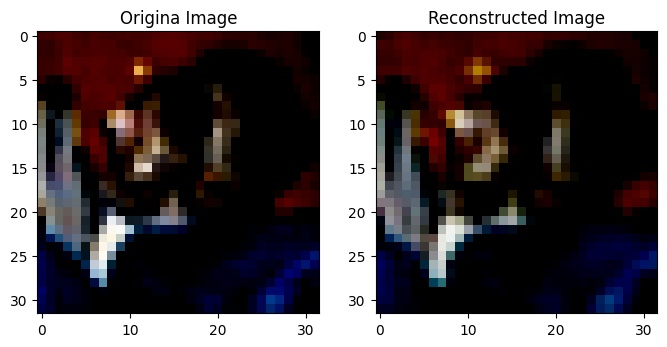

MSE: tensor(0.0047, device='cuda:1')
MAE: tensor(0.0485, device='cuda:1')


In [15]:
model = m.AutoEncoder("2",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, maeLoss, "./modelos/block2/block2_32x32menys1MAE.pt",train_dl2,test_dl2, model, device)
pipeline.showImages(test_dl2, model,device)
pipeline.calculate_metrics(model, test_dl2,device)

- sigmoide
- DATOS NORMALIZADOS 0,1
- TAMAÑO 32 X 32
- PERDIDA Mseloss

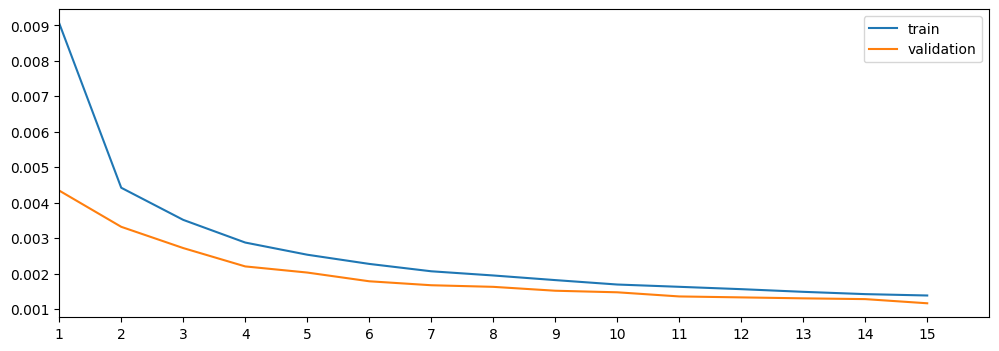

Epoch:15 Training Loss:0.0013816996503243672 Validation Loss:0.0011622294989718904: 100%|██████████| 15/15 [03:50<00:00, 15.36s/it]


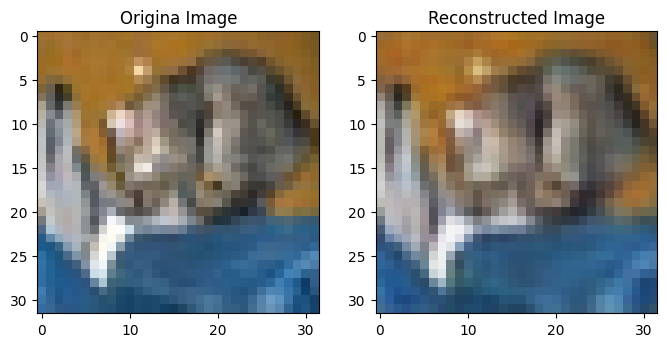

MSE: tensor(0.0012, device='cuda:1')
MAE: tensor(0.0245, device='cuda:1')


In [16]:
model = m.AutoEncoder("2",nn.Sigmoid()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block2/block2_32x32Sigmoide.pt",train_dl1,test_dl1, model, device)
pipeline.showImages(test_dl1, model,device)
pipeline.calculate_metrics(model, test_dl1,device)

- sigmoide
- DATOS NORMALIZADOS 0,1
- TAMAÑO 32 X 32
- PERDIDA bceloss

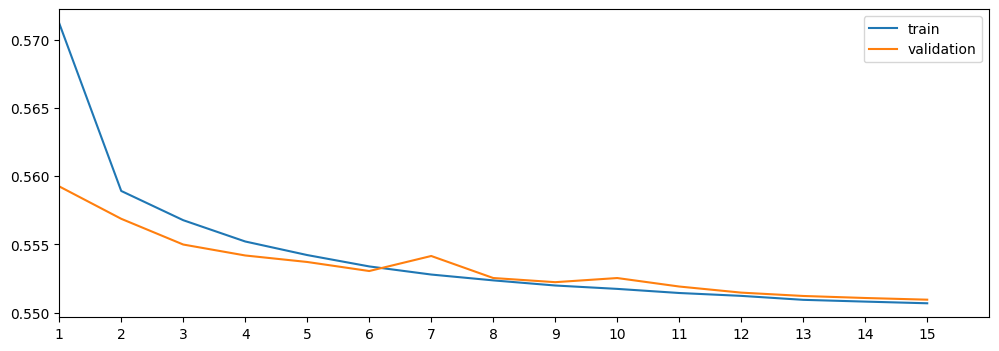

Epoch:15 Training Loss:0.5506827870420732 Validation Loss:0.5509464076791388: 100%|██████████| 15/15 [03:50<00:00, 15.38s/it]


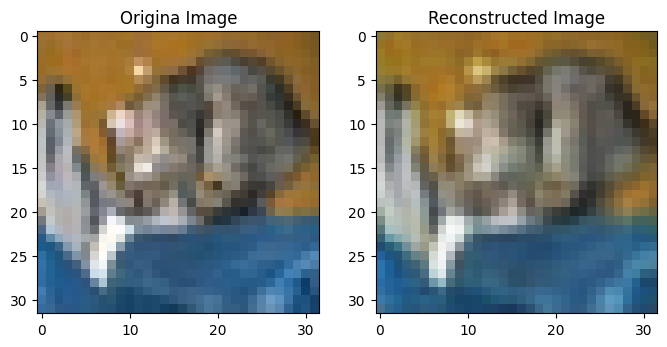

MSE: tensor(0.0012, device='cuda:1')
MAE: tensor(0.0248, device='cuda:1')


In [17]:
model = m.AutoEncoder("2",nn.Sigmoid()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, bceLoss, "./modelos/block2/block2_32x32SigmoideBCE.pt",train_dl1,test_dl1, model, device)
pipeline.showImages(test_dl1, model,device)
pipeline.calculate_metrics(model, test_dl1,device)

# BLOQUE 2 - 224X 224 SALIDA ENCODER [128, 56, 56]

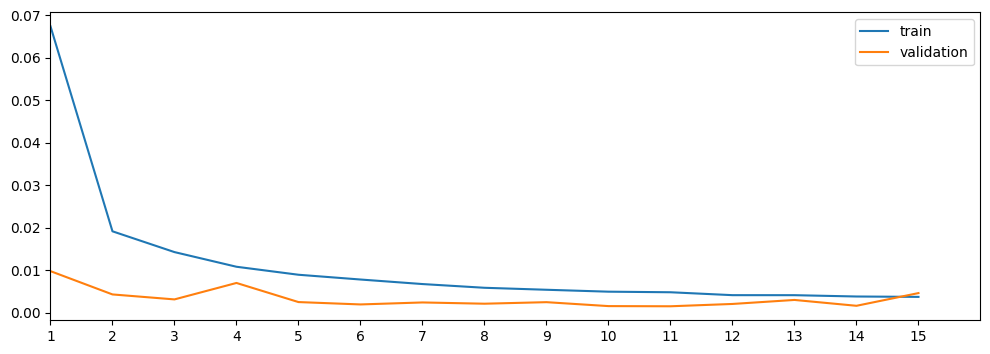

Epoch:15 Training Loss:0.0037255328431855116 Validation Loss:0.004619327483411091: 100%|██████████| 15/15 [37:24<00:00, 149.66s/it] 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8952821..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8552356..2.402624].


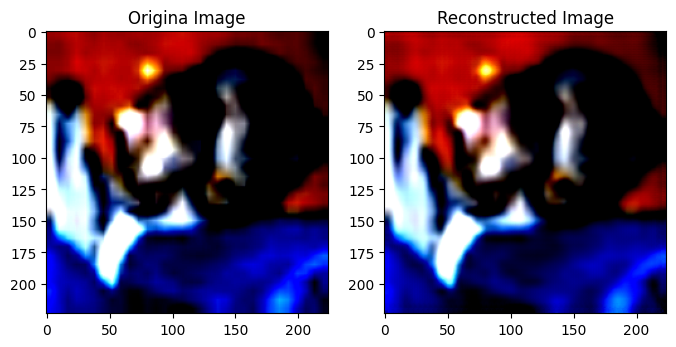

MSE: tensor(0.0046, device='cuda:1')
MAE: tensor(0.0545, device='cuda:1')


In [18]:
model = m.AutoEncoder("2", None).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block2/block2_224x224SIN.pt",train_dl3,test_dl3, model, device)
pipeline.showImages(test_dl3, model,device)
pipeline.calculate_metrics(model, test_dl3,device)

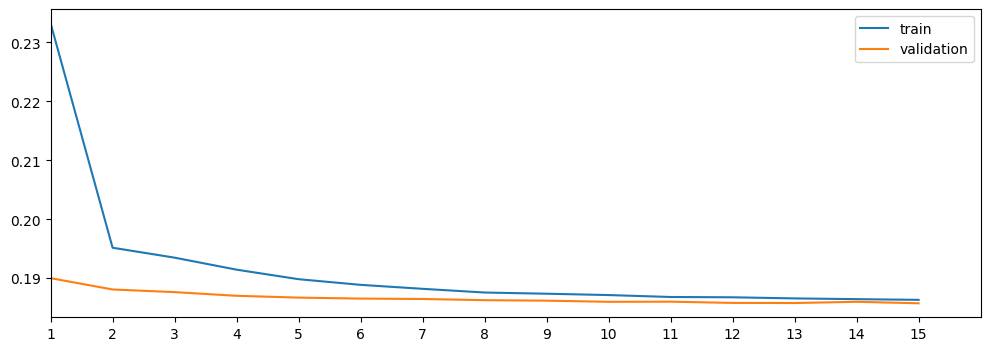

Epoch:15 Training Loss:0.18633825360083908 Validation Loss:0.18575517922595167: 100%|██████████| 15/15 [37:29<00:00, 149.93s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8952821..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


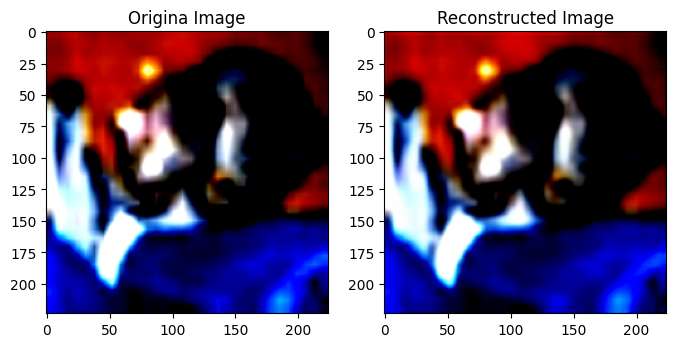

MSE: tensor(0.1858, device='cuda:1')
MAE: tensor(0.2315, device='cuda:1')


In [19]:
model = m.AutoEncoder("2",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block2/block2_224x224tanh.pt",train_dl3,test_dl3, model, device)
pipeline.showImages(test_dl3, model,device)
pipeline.calculate_metrics(model, test_dl3,device)

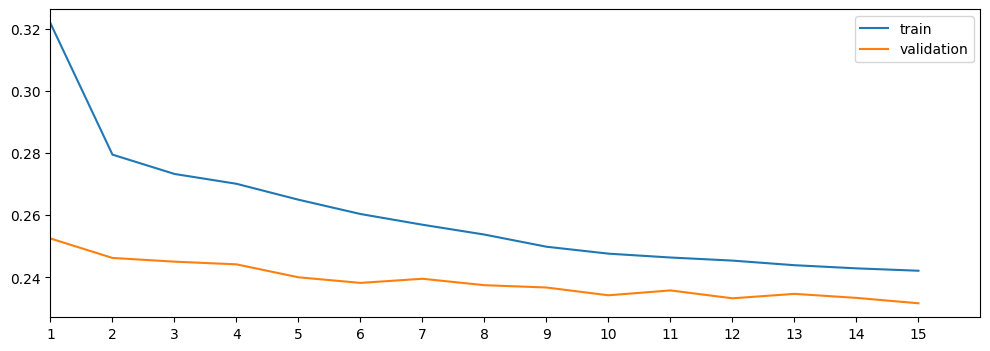

Epoch:15 Training Loss:0.24212205309887883 Validation Loss:0.2316334567059284: 100%|██████████| 15/15 [37:24<00:00, 149.65s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8952821..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


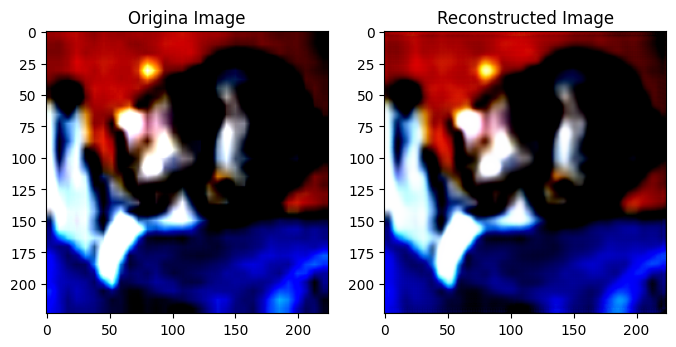

MSE: tensor(0.1858, device='cuda:1')
MAE: tensor(0.2316, device='cuda:1')


In [20]:
model = m.AutoEncoder("2",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, maeLoss, "./modelos/block2/block2_224x224tanhMAE.pt",train_dl3,test_dl3, model, device)
pipeline.showImages(test_dl3, model,device)
pipeline.calculate_metrics(model, test_dl3,device)

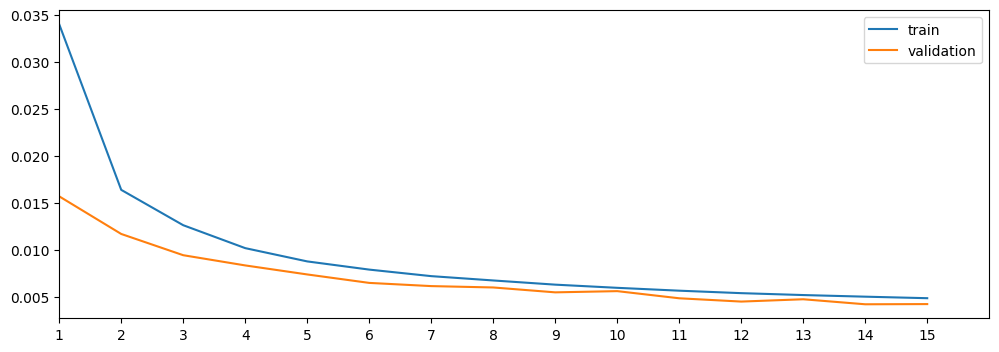

Epoch:15 Training Loss:0.004842360491820247 Validation Loss:0.004215906589533547: 100%|██████████| 15/15 [03:46<00:00, 15.13s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8980392..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8131672..0.9624028].


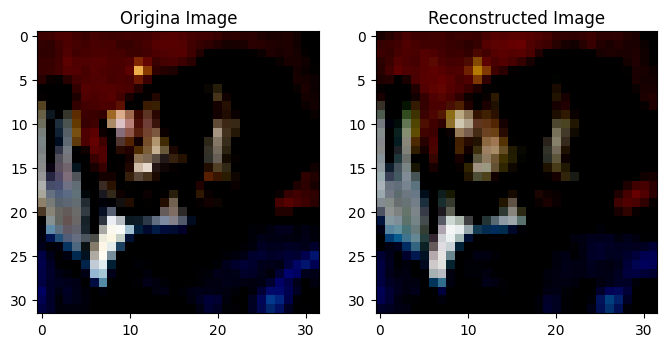

MSE: tensor(0.0042, device='cuda:1')
MAE: tensor(0.0466, device='cuda:1')


In [21]:
model = m.AutoEncoder("2",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block2/block2_224x224menys1.pt",train_dl5,test_dl5, model, device)
pipeline.showImages(test_dl5, model,device)
pipeline.calculate_metrics(model, test_dl5,device)

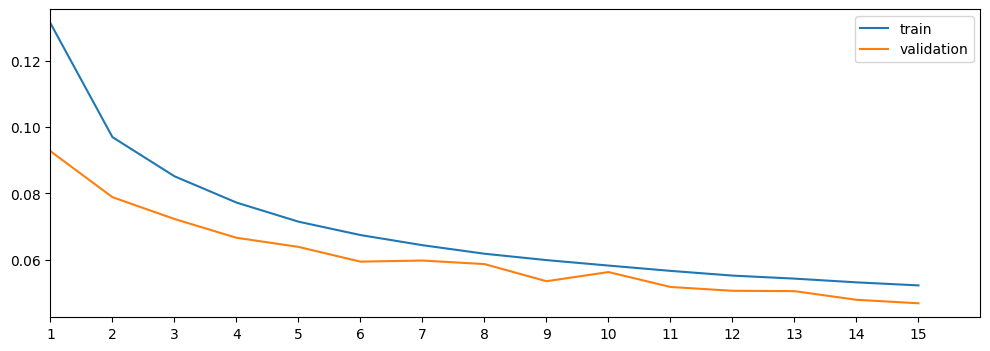

Epoch:15 Training Loss:0.05232860758033568 Validation Loss:0.04694646476269483: 100%|██████████| 15/15 [03:48<00:00, 15.25s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8980392..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.82266325..0.92782575].


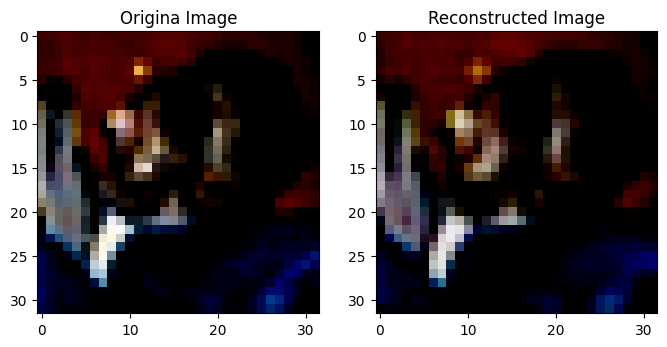

MSE: tensor(0.0045, device='cuda:1')
MAE: tensor(0.0469, device='cuda:1')


In [22]:
model = m.AutoEncoder("2",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, maeLoss, "./modelos/block2/block2_224x224menys1MAE.pt",train_dl5,test_dl5, model, device)
pipeline.showImages(test_dl5, model,device)
pipeline.calculate_metrics(model, test_dl5,device)

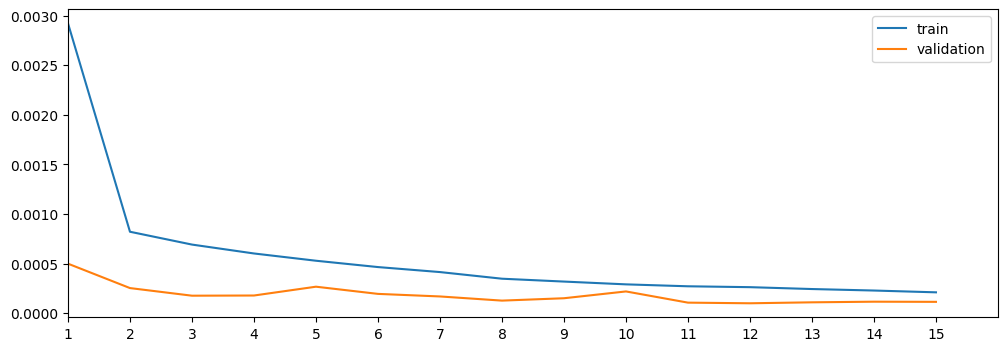

Epoch:15 Training Loss:0.0002094638176831466 Validation Loss:0.0001134904498407007: 100%|██████████| 15/15 [37:18<00:00, 149.22s/it]  


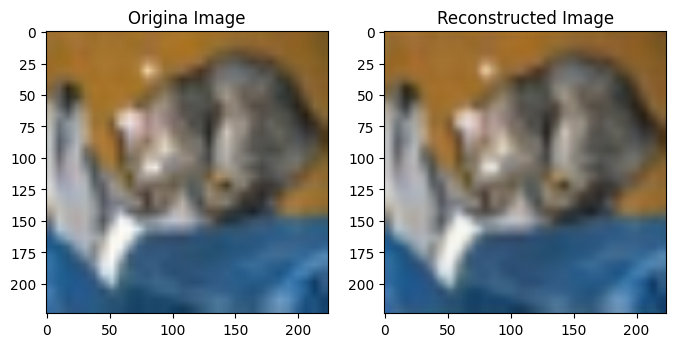

MSE: tensor(0.0001, device='cuda:1')
MAE: tensor(0.0083, device='cuda:1')


In [23]:
model = m.AutoEncoder("2",nn.Sigmoid()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block2/block2_224x224Sigmoide.pt",train_dl4,test_dl4, model, device)
pipeline.showImages(test_dl4, model,device)
pipeline.calculate_metrics(model, test_dl4,device)

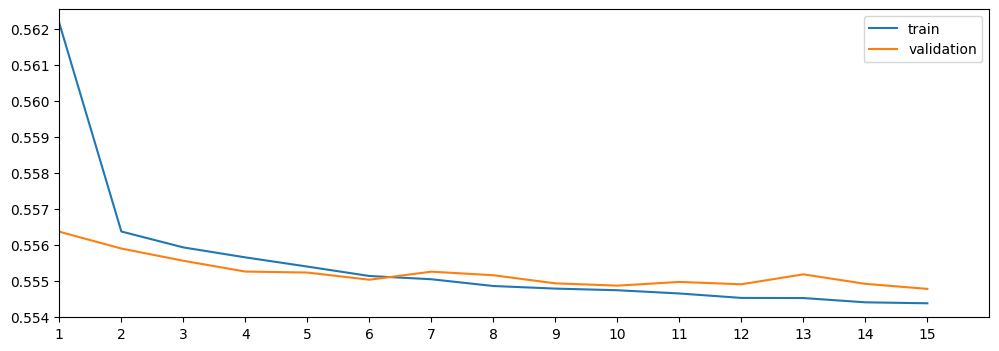

Epoch:15 Training Loss:0.5543798140658542 Validation Loss:0.5547791936587001: 100%|██████████| 15/15 [37:19<00:00, 149.31s/it]


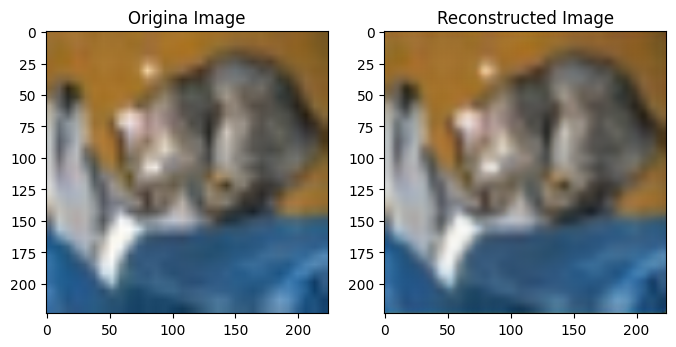

MSE: tensor(9.3120e-05, device='cuda:1')
MAE: tensor(0.0072, device='cuda:1')


In [24]:
model = m.AutoEncoder("2",nn.Sigmoid()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, bceLoss, "./modelos/block2/block2_224x224SigmoideBCE.pt",train_dl4,test_dl4, model, device)
pipeline.showImages(test_dl4, model,device)
pipeline.calculate_metrics(model, test_dl4,device)

# BLOQUE 3 - SALIDA ENCODER [256,4,4]

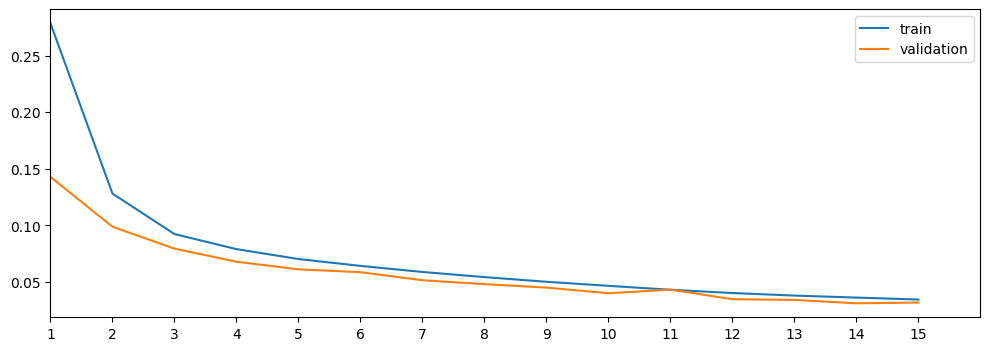

Epoch:15 Training Loss:0.03437844495136508 Validation Loss:0.031710318578728316: 100%|██████████| 15/15 [04:32<00:00, 18.20s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8952821..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7354275..2.911737].


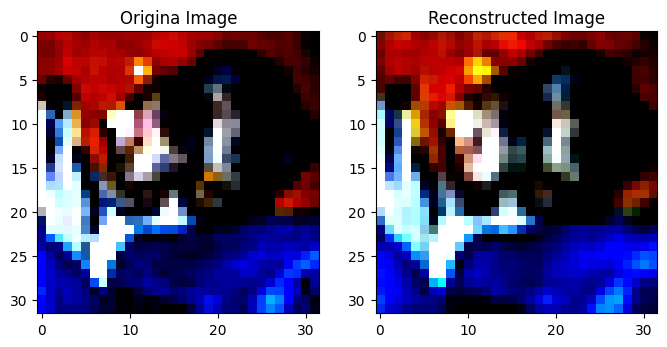

MSE: tensor(0.0317, device='cuda:1')
MAE: tensor(0.1274, device='cuda:1')


In [10]:
model = m.AutoEncoder("3", None).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block3/block3_32x32SIN.pt",train_dl,test_dl, model, device)
pipeline.showImages(test_dl, model,device)
pipeline.calculate_metrics(model, test_dl,device)

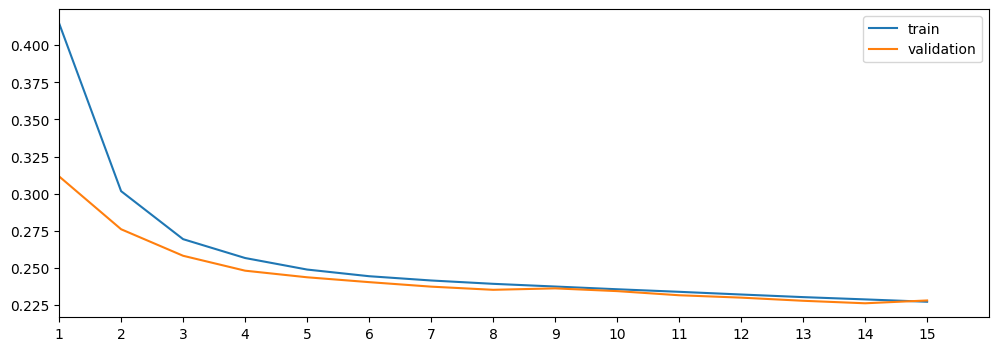

Epoch:15 Training Loss:0.2272345337616732 Validation Loss:0.2280982699373673: 100%|██████████| 15/15 [04:34<00:00, 18.32s/it]  


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8952821..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99958575..1.0].


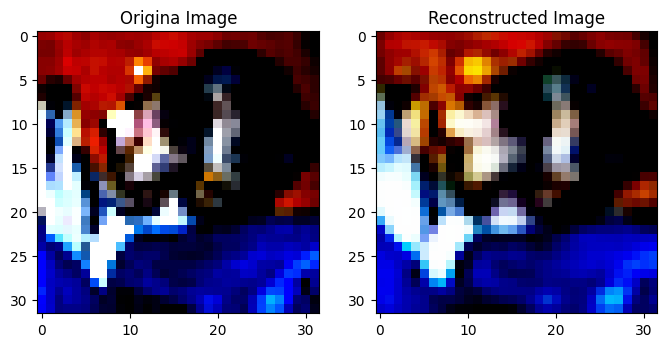

MSE: tensor(0.2281, device='cuda:1')
MAE: tensor(0.3243, device='cuda:1')


In [11]:
model = m.AutoEncoder("3",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block3/block3_32x32tanh.pt",train_dl,test_dl, model, device)
pipeline.showImages(test_dl, model,device)
pipeline.calculate_metrics(model, test_dl,device)

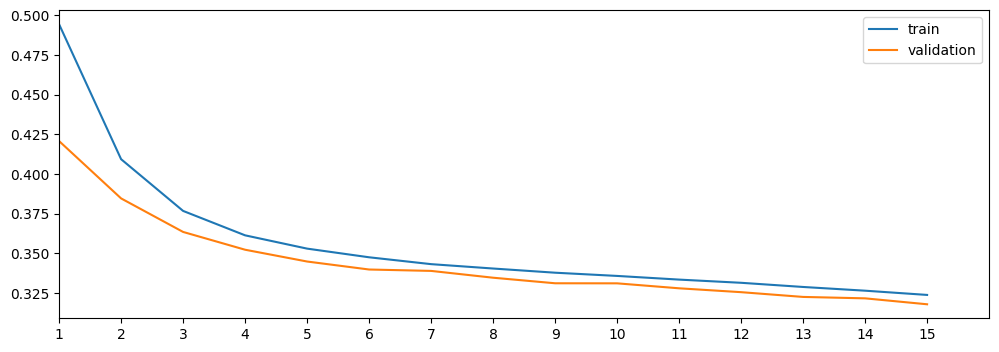

Epoch:15 Training Loss:0.32375709765244903 Validation Loss:0.317861164617038: 100%|██████████| 15/15 [06:23<00:00, 25.56s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8952821..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999371..0.99999994].


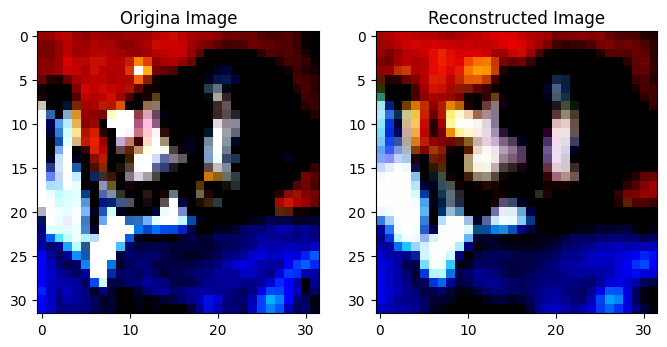

MSE: tensor(0.2266, device='cuda:1')
MAE: tensor(0.3179, device='cuda:1')


In [12]:
model = m.AutoEncoder("3",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, maeLoss, "./modelos/block3/block3_32x32tanhMAE.pt",train_dl,test_dl, model, device)
pipeline.showImages(test_dl, model,device)
pipeline.calculate_metrics(model, test_dl,device)

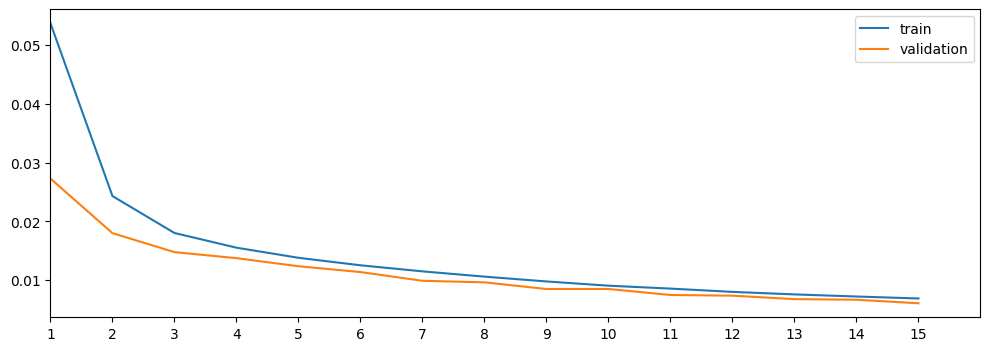

Epoch:15 Training Loss:0.00689173427320476 Validation Loss:0.006074302046485748: 100%|██████████| 15/15 [05:22<00:00, 21.48s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8980392..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8174486..0.9362635].


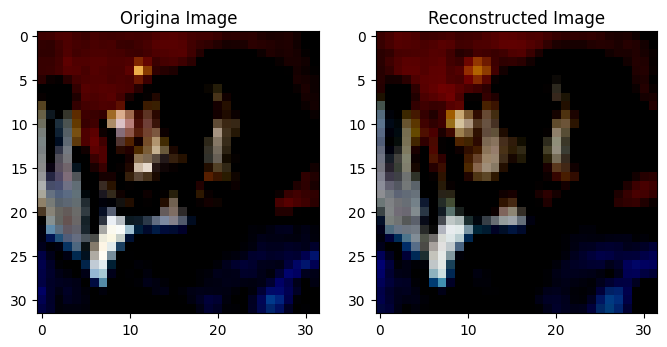

MSE: tensor(0.0061, device='cuda:1')
MAE: tensor(0.0553, device='cuda:1')


In [13]:
model = m.AutoEncoder("3",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block3/block3_32x32menys1.pt",train_dl2,test_dl2, model, device)
pipeline.showImages(test_dl2, model,device)
pipeline.calculate_metrics(model, test_dl2,device)

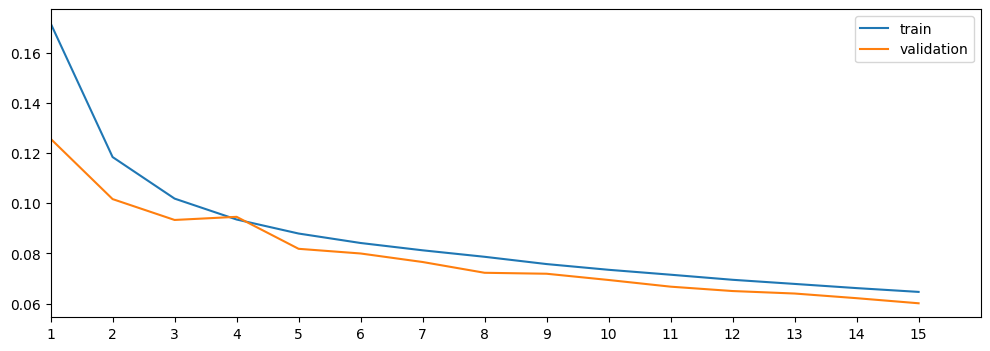

Epoch:15 Training Loss:0.06466805464495923 Validation Loss:0.060136041021731305: 100%|██████████| 15/15 [04:44<00:00, 18.96s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8980392..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.81328756..0.91021913].


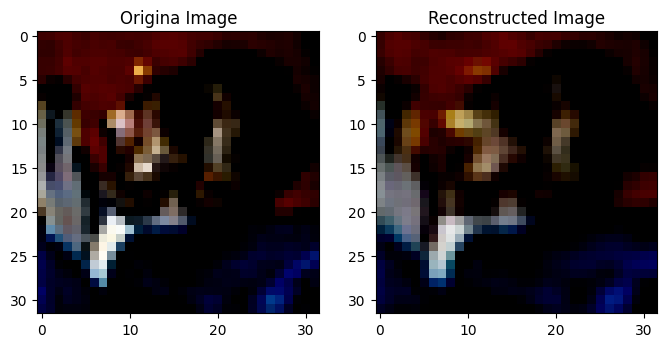

MSE: tensor(0.0076, device='cuda:1')
MAE: tensor(0.0601, device='cuda:1')


In [14]:
model = m.AutoEncoder("3",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, maeLoss, "./modelos/block3/block3_32x32menys1MAE.pt",train_dl2,test_dl2, model, device)
pipeline.showImages(test_dl2, model,device)
pipeline.calculate_metrics(model, test_dl2,device)

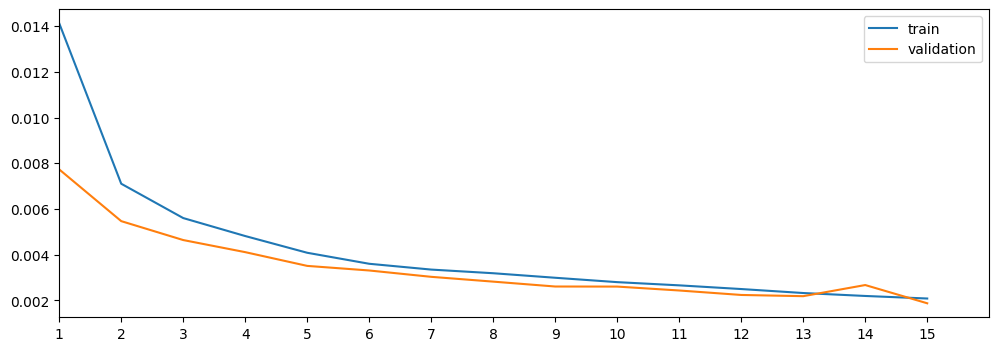

Epoch:15 Training Loss:0.002081791846342519 Validation Loss:0.0018734526907748681: 100%|██████████| 15/15 [04:34<00:00, 18.31s/it]


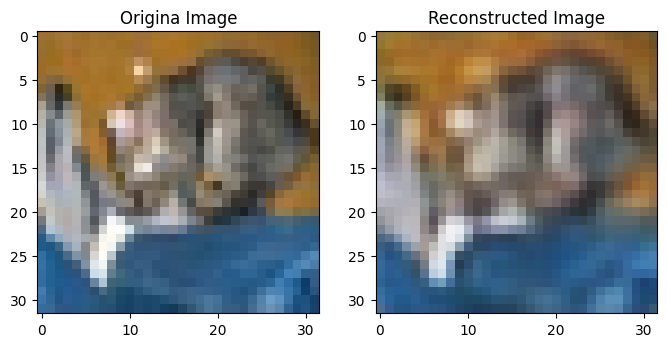

MSE: tensor(0.0019, device='cuda:1')
MAE: tensor(0.0307, device='cuda:1')


In [15]:
model = m.AutoEncoder("3",nn.Sigmoid()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block3/block3_32x32Sigmoide.pt",train_dl1,test_dl1, model, device)
pipeline.showImages(test_dl1, model,device)
pipeline.calculate_metrics(model, test_dl1,device)

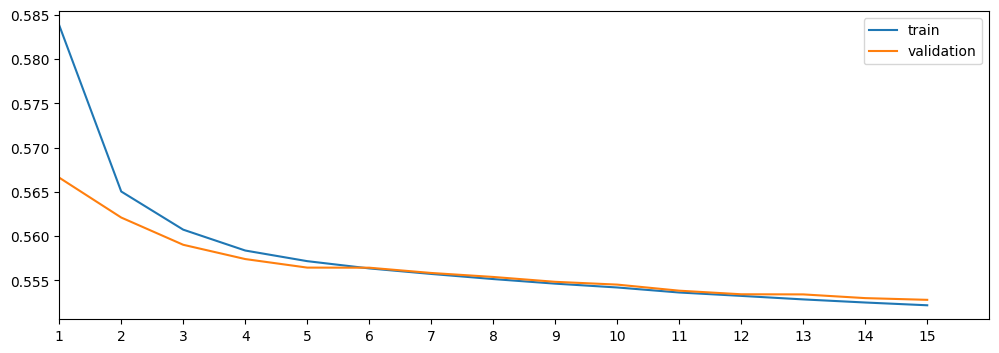

Epoch:15 Training Loss:0.5521908590875132 Validation Loss:0.552805343980732: 100%|██████████| 15/15 [04:35<00:00, 18.37s/it]


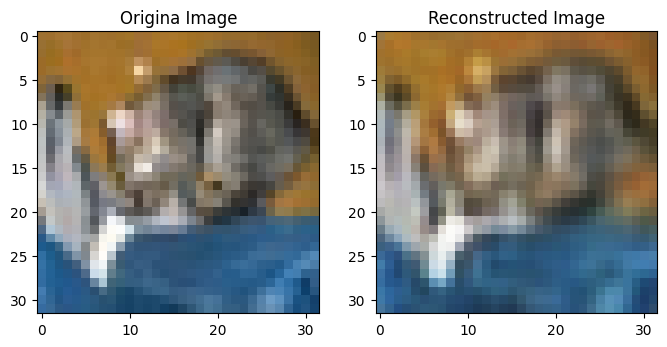

MSE: tensor(0.0020, device='cuda:1')
MAE: tensor(0.0315, device='cuda:1')


In [16]:
model = m.AutoEncoder("3",nn.Sigmoid()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, bceLoss, "./modelos/block3/block3_32x32SigmoideBCE.pt",train_dl1,test_dl1, model, device)
pipeline.showImages(test_dl1, model,device)
pipeline.calculate_metrics(model, test_dl1,device)

# BLOQUE 3 - 224X224 SALIDA ENCODER [256, 28, 28]

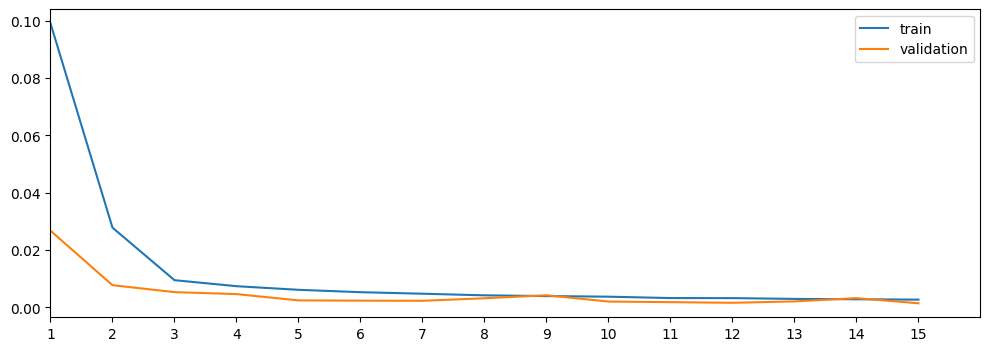

Epoch:15 Training Loss:0.002695283942186035 Validation Loss:0.0014221006604693439: 100%|██████████| 15/15 [49:20<00:00, 197.39s/it] 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8952821..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8334569..2.486116].


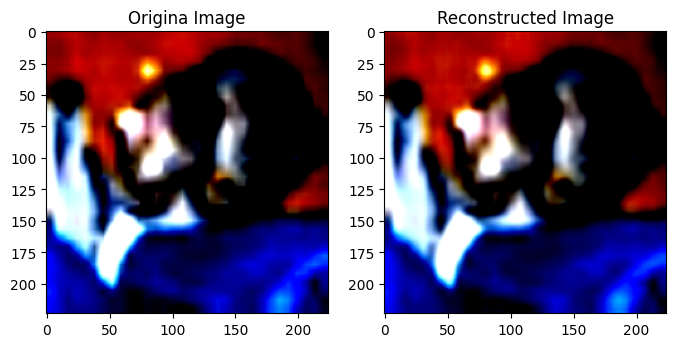

MSE: tensor(0.0014, device='cuda:1')
MAE: tensor(0.0281, device='cuda:1')


In [18]:
model = m.AutoEncoder("3", None).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block3/block3_224x224SIN.pt",train_dl3,test_dl3, model, device)
pipeline.showImages(test_dl3, model,device)
pipeline.calculate_metrics(model, test_dl3,device)

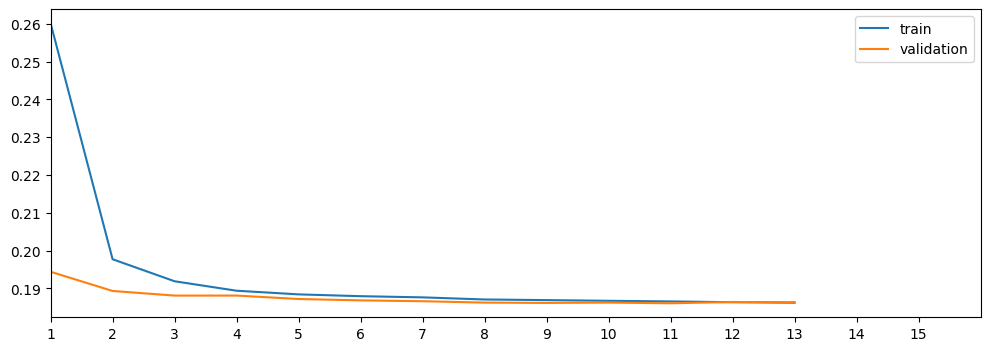

Epoch:13 Training Loss:0.18624903547706614 Validation Loss:0.1863630515323586:  87%|████████▋ | 13/15 [45:17<07:06, 213.09s/it]
 25%|██▍       | 413/1667 [00:52<02:11,  9.55it/s]

In [ ]:
model = m.AutoEncoder("3",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block3/block3_224x224tanh.pt",train_dl3,test_dl3, model, device)
pipeline.showImages(test_dl3, model,device)
pipeline.calculate_metrics(model, test_dl3,device)

In [ ]:
model = m.AutoEncoder("3",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, maeLoss, "./modelos/block3/block3_224x224tanhMAE.pt",train_dl3,test_dl3, model, device)
pipeline.showImages(test_dl3, model,device)
pipeline.calculate_metrics(model, test_dl3,device)

In [ ]:
model = m.AutoEncoder("3",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block3/block3_224x224menys1.pt",train_dl5,test_dl5, model, device)
pipeline.showImages(test_dl5, model,device)
pipeline.calculate_metrics(model, test_dl5,device)

In [ ]:
model = m.AutoEncoder("3",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, maeLoss, "./modelos/block3/block3_224x224menys1MAE.pt",train_dl5,test_dl5, model, device)
pipeline.showImages(test_dl5, model,device)
pipeline.calculate_metrics(model, test_dl5,device)

In [ ]:
model = m.AutoEncoder("3",nn.Sigmoid()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block3/block3_224x224Sigmoide.pt",train_dl4,test_dl4, model, device)
pipeline.showImages(test_dl4, model,device)
pipeline.calculate_metrics(model, test_dl4,device)

In [ ]:
model = m.AutoEncoder("3",nn.Sigmoid()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, bceLoss, "./modelos/block3/block3_224x224SigmoideBCE.pt",train_dl4,test_dl4, model, device)
pipeline.showImages(test_dl4, model,device)
pipeline.calculate_metrics(model, test_dl4,device)

# BLOQUE 4- SALIDA ENCODER [512, 2, 2]

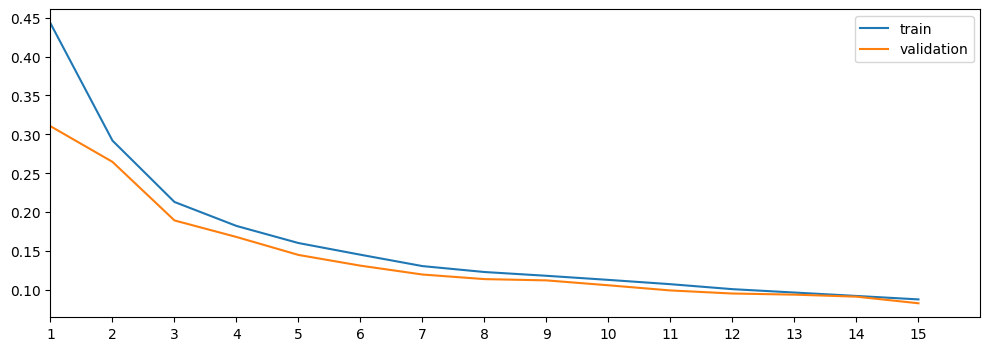

Epoch:15 Training Loss:0.08803189230326341 Validation Loss:0.0830626334084653: 100%|██████████| 15/15 [05:29<00:00, 21.99s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8952821..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7305906..2.4661305].


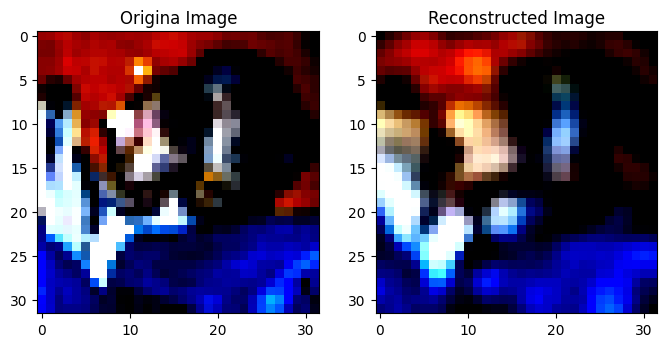

MSE: tensor(0.0831, device='cuda:1')
MAE: tensor(0.2063, device='cuda:1')


In [17]:
model = m.AutoEncoder("4", None).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block4/block4_32x32SIN.pt",train_dl,test_dl, model, device)
pipeline.showImages(test_dl, model,device)
pipeline.calculate_metrics(model, test_dl,device)

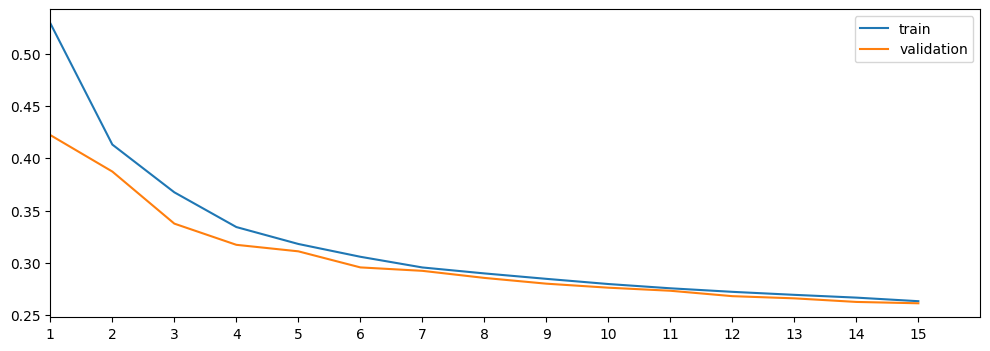

Epoch:15 Training Loss:0.2633921359389144 Validation Loss:0.26140739916191286: 100%|██████████| 15/15 [05:30<00:00, 22.06s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8952821..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99987644..1.0].


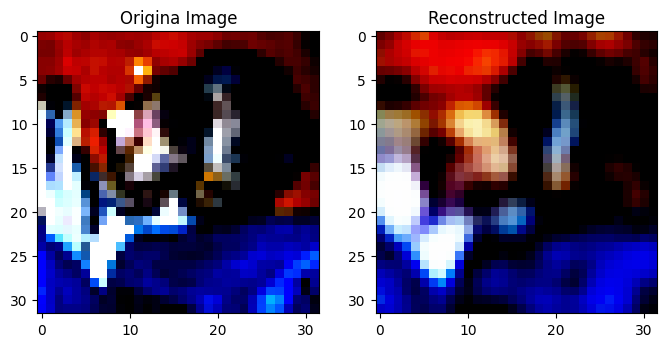

MSE: tensor(0.2614, device='cuda:1')
MAE: tensor(0.3673, device='cuda:1')


In [18]:
model = m.AutoEncoder("4",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block4/block4_32x32tanh.pt",train_dl,test_dl, model, device)
pipeline.showImages(test_dl, model,device)
pipeline.calculate_metrics(model, test_dl,device)

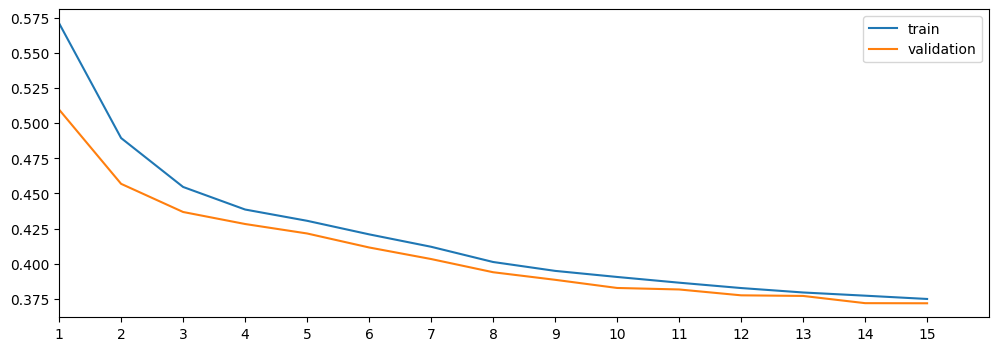

Epoch:15 Training Loss:0.3749036545802107 Validation Loss:0.3718291868244869: 100%|██████████| 15/15 [05:32<00:00, 22.18s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8952821..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99993604..0.9999999].


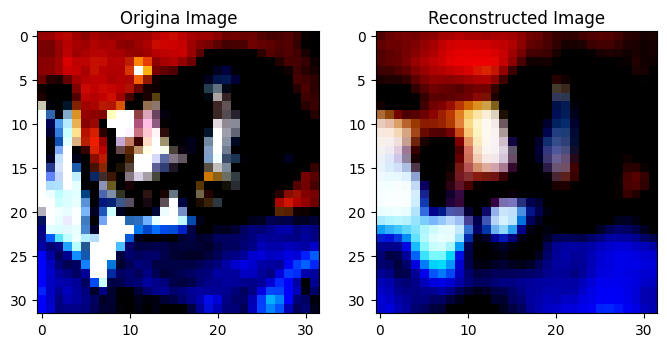

MSE: tensor(0.2702, device='cuda:1')
MAE: tensor(0.3718, device='cuda:1')


In [19]:
model = m.AutoEncoder("4",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, maeLoss, "./modelos/block4/block4_32x32tanhMAE.pt",train_dl,test_dl, model, device)
pipeline.showImages(test_dl, model,device)
pipeline.calculate_metrics(model, test_dl,device)

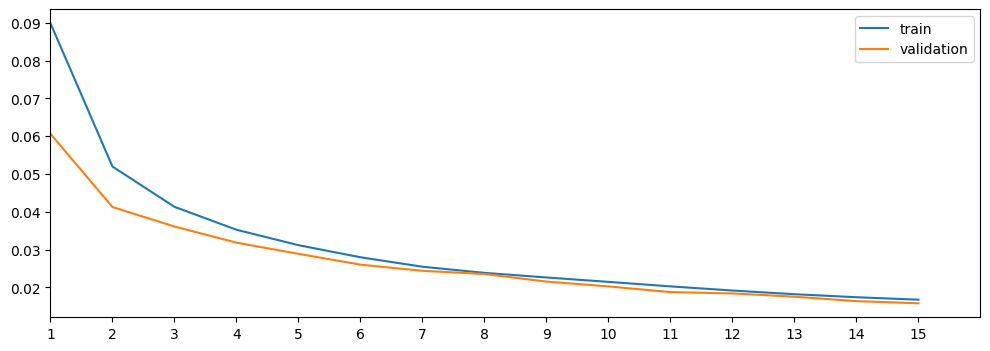

Epoch:15 Training Loss:0.01677626835704118 Validation Loss:0.015824594688524995: 100%|██████████| 15/15 [05:32<00:00, 22.15s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8980392..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.75550294..0.84075236].


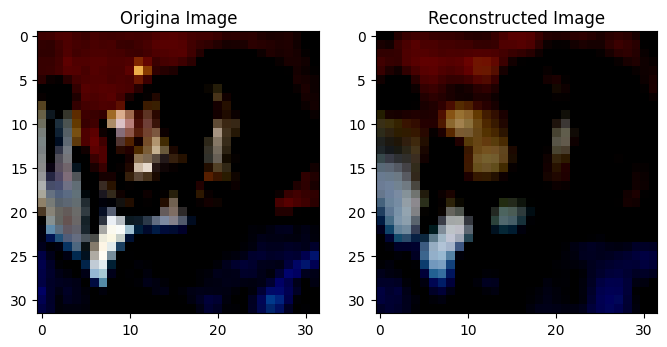

MSE: tensor(0.0158, device='cuda:1')
MAE: tensor(0.0891, device='cuda:1')


In [20]:
model = m.AutoEncoder("4",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block4/block4_32x32menys1.pt",train_dl2,test_dl2, model, device)
pipeline.showImages(test_dl2, model,device)
pipeline.calculate_metrics(model, test_dl2,device)

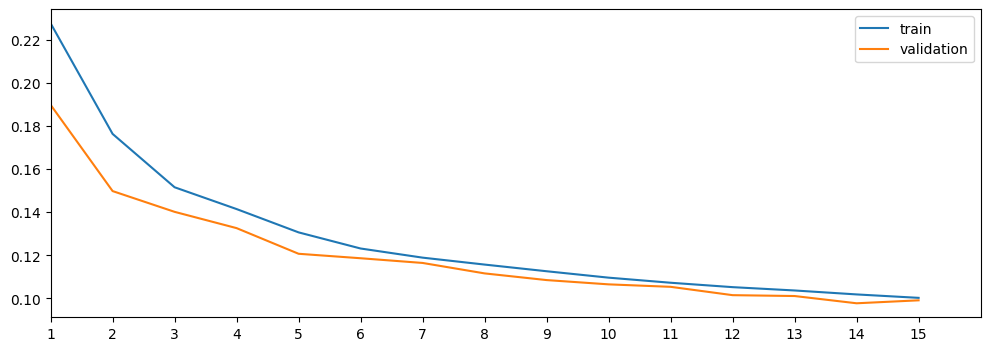

Epoch:15 Training Loss:0.10027673078033834 Validation Loss:0.09912936979237347: 100%|██████████| 15/15 [05:33<00:00, 22.22s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8980392..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.76734996..0.71807593].


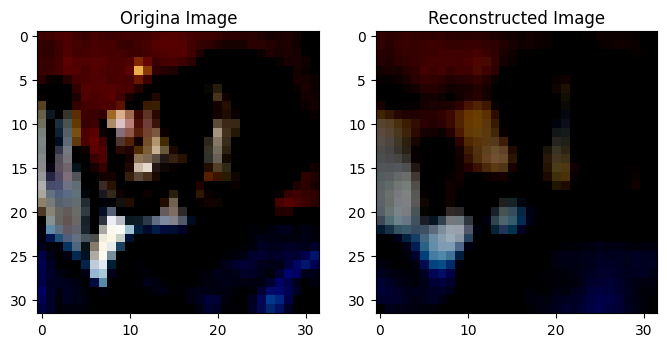

MSE: tensor(0.0209, device='cuda:1')
MAE: tensor(0.0991, device='cuda:1')


In [21]:
model = m.AutoEncoder("4",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, maeLoss, "./modelos/block4/block4_32x32menys1MAE.pt",train_dl2,test_dl2, model, device)
pipeline.showImages(test_dl2, model,device)
pipeline.calculate_metrics(model, test_dl2,device)

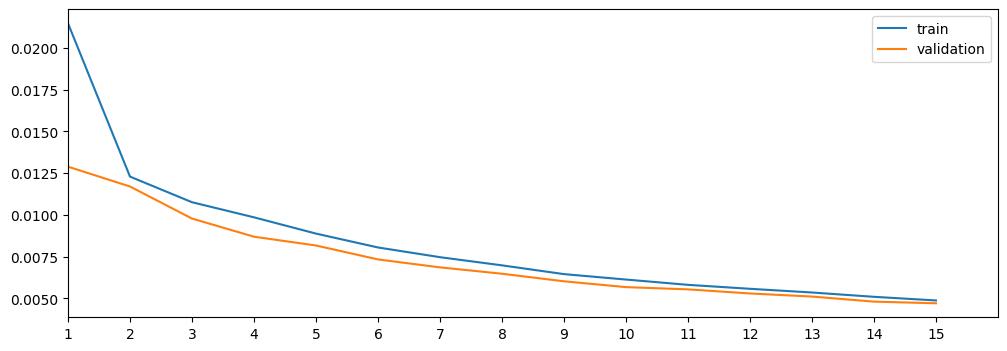

Epoch:15 Training Loss:0.004882229954377487 Validation Loss:0.0047129112769845405: 100%|██████████| 15/15 [06:46<00:00, 27.12s/it]


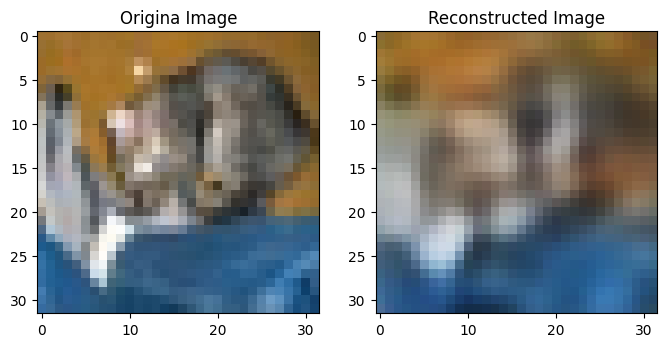

MSE: tensor(0.0047, device='cuda:1')
MAE: tensor(0.0490, device='cuda:1')


In [22]:
model = m.AutoEncoder("4",nn.Sigmoid()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block4/block4_32x32Sigmoide.pt",train_dl1,test_dl1, model, device)
pipeline.showImages(test_dl1, model,device)
pipeline.calculate_metrics(model, test_dl1,device)

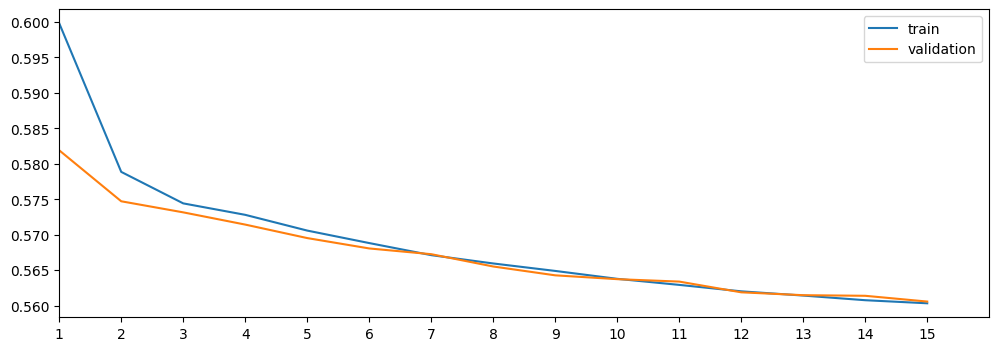

Epoch:15 Training Loss:0.560334505831759 Validation Loss:0.5605765927409839: 100%|██████████| 15/15 [06:20<00:00, 25.38s/it] 


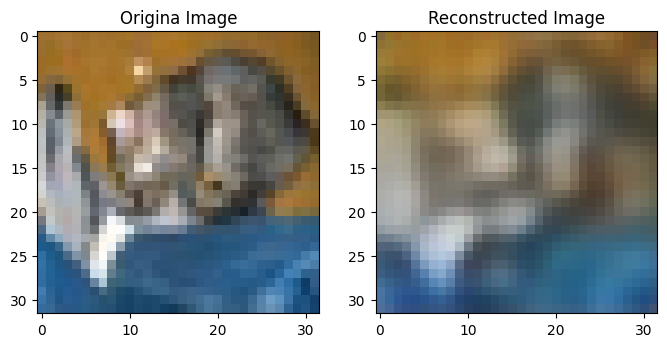

MSE: tensor(0.0050, device='cuda:1')
MAE: tensor(0.0500, device='cuda:1')


In [23]:
model = m.AutoEncoder("4",nn.Sigmoid()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, bceLoss, "./modelos/block4/block4_32x32SigmoideBCE.pt",train_dl1,test_dl1, model, device)
pipeline.showImages(test_dl1, model,device)
pipeline.calculate_metrics(model, test_dl1,device)

# BLOQUE 4 - 224X224 SALIDA ENCODER [512, 14, 14]

In [ ]:
model = m.AutoEncoder("4", None).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block4/block4_224x224SIN.pt",train_dl3,test_dl3, model, device)
pipeline.showImages(test_dl3, model,device)
pipeline.calculate_metrics(model, test_dl3,device)

In [ ]:
model = m.AutoEncoder("4",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block4/block4_224x224tanh.pt",train_dl3,test_dl3, model, device)
pipeline.showImages(test_dl3, model,device)
pipeline.calculate_metrics(model, test_dl3,device)

In [ ]:
model = m.AutoEncoder("4",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, maeLoss, "./modelos/block4/block4_224x224tanhMAE.pt",train_dl3,test_dl3, model, device)
pipeline.showImages(test_dl3, model,device)
pipeline.calculate_metrics(model, test_dl3,device)

In [ ]:
model = m.AutoEncoder("4",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block4/block4_224x224menys1.pt",train_dl5,test_dl5, model, device)
pipeline.showImages(test_dl5, model,device)
pipeline.calculate_metrics(model, test_dl5,device)

In [ ]:
model = m.AutoEncoder("4",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, maeLoss, "./modelos/block4/block4_224x224menys1MAE.pt",train_dl5,test_dl5, model, device)
pipeline.showImages(test_dl5, model,device)
pipeline.calculate_metrics(model, test_dl5,device)

In [ ]:
model = m.AutoEncoder("4",nn.Sigmoid()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block4/block4_224x224Sigmoide.pt",train_dl4,test_dl4, model, device)
pipeline.showImages(test_dl4, model,device)
pipeline.calculate_metrics(model, test_dl4,device)

In [ ]:
model = m.AutoEncoder("4",nn.Sigmoid()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, bceLoss, "./modelos/block4/block4_224x224SigmoideBCE.pt",train_dl4,test_dl4, model, device)
pipeline.showImages(test_dl4, model,device)
pipeline.calculate_metrics(model, test_dl4,device)

#   BLOQUE 5 - SALIDA ENCODER [512, 1, 1]

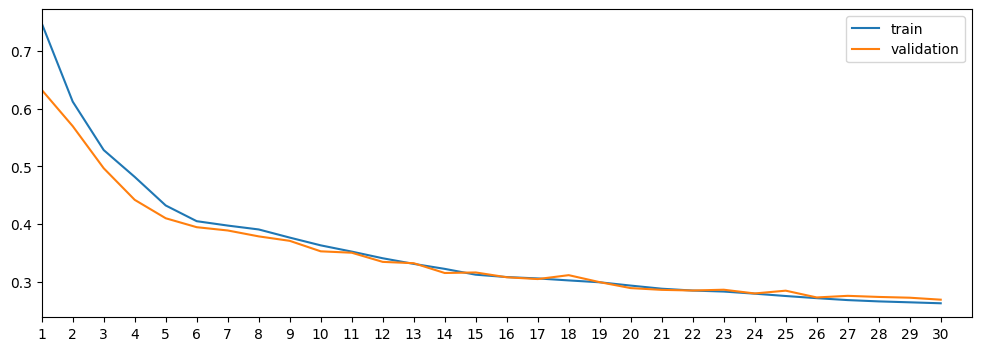

Epoch:30 Training Loss:0.2632120017724332 Validation Loss:0.2694317702946813: 100%|██████████| 30/30 [15:50<00:00, 31.69s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8952821..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0836602..1.1842723].


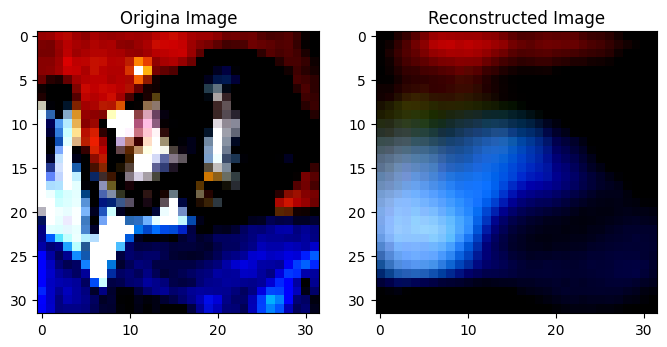

MSE: tensor(0.2694, device='cuda:1')
MAE: tensor(0.3801, device='cuda:1')


In [11]:
model = m.AutoEncoder("5", None).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(30,optimizer, mseLoss, "./modelos/block5/block5_32x32SIN.pt",train_dl,test_dl, model, device)
pipeline.showImages(test_dl, model,device)
pipeline.calculate_metrics(model, test_dl,device)

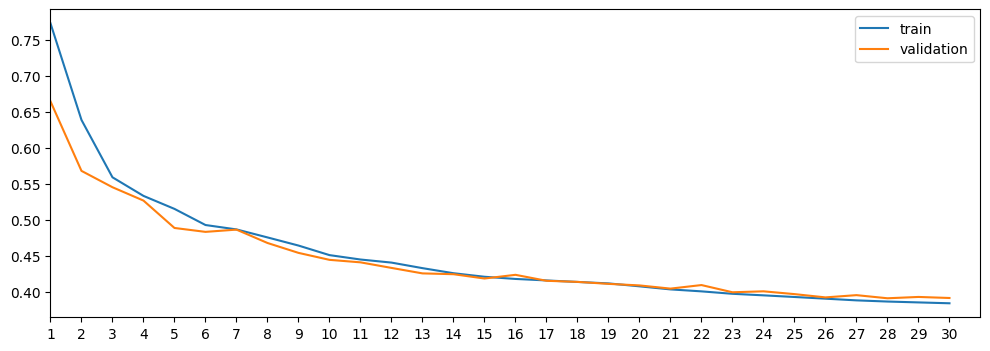

Epoch:30 Training Loss:0.3842691951478822 Validation Loss:0.3916075897851269: 100%|██████████| 30/30 [16:08<00:00, 32.29s/it] 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8952821..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.997139..0.9999939].


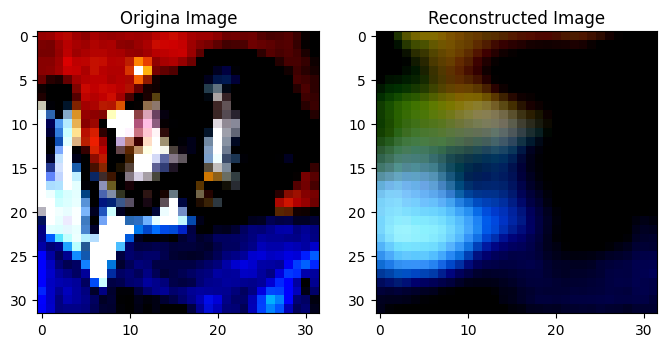

MSE: tensor(0.3916, device='cuda:1')
MAE: tensor(0.4779, device='cuda:1')


In [12]:
model = m.AutoEncoder("5",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(30,optimizer, mseLoss, "./modelos/block5/block5_32x32tanh.pt",train_dl,test_dl, model, device)
pipeline.showImages(test_dl, model,device)
pipeline.calculate_metrics(model, test_dl,device)

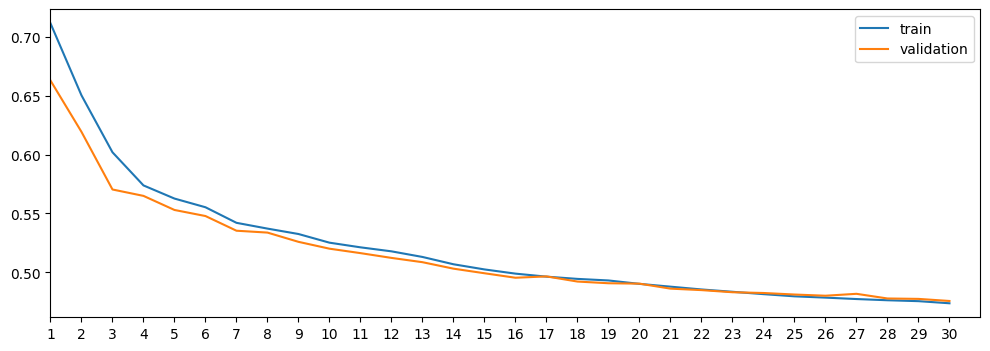

Epoch:30 Training Loss:0.4736655210404605 Validation Loss:0.4756152187508979: 100%|██████████| 30/30 [19:02<00:00, 38.08s/it] 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8952821..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9959092..0.99999845].


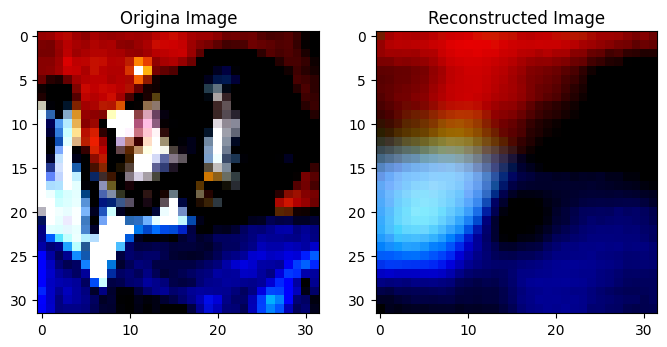

MSE: tensor(0.4057, device='cuda:1')
MAE: tensor(0.4756, device='cuda:1')


In [13]:
model = m.AutoEncoder("5",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(30,optimizer, maeLoss, "./modelos/block5/block5_32x32tanhMAE.pt",train_dl,test_dl, model, device)
pipeline.showImages(test_dl, model,device)
pipeline.calculate_metrics(model, test_dl,device)

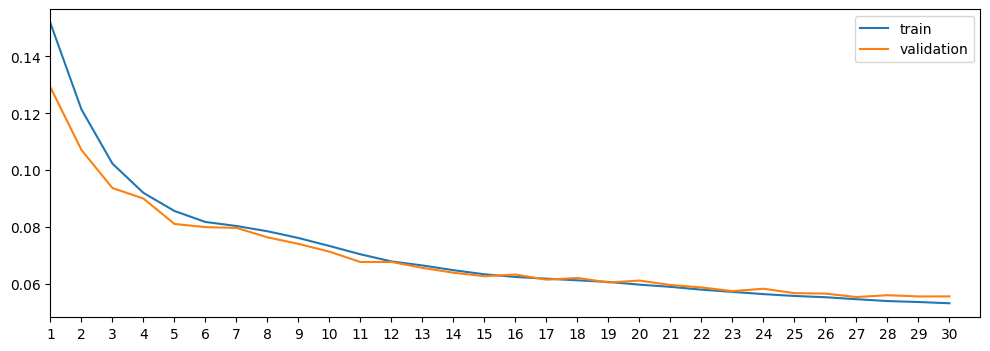

Epoch:30 Training Loss:0.053240018053707705 Validation Loss:0.055665569058780014: 100%|██████████| 30/30 [18:15<00:00, 36.53s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8980392..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.59674966..0.30556062].


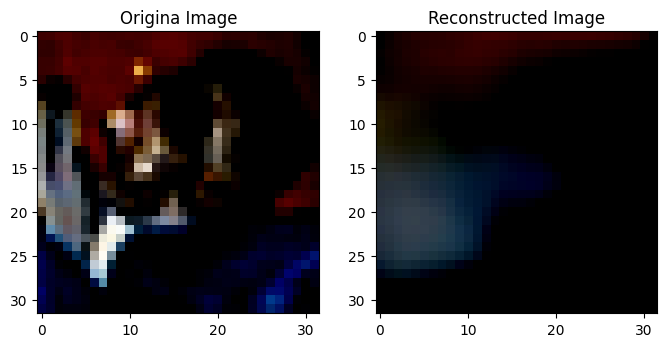

MSE: tensor(0.0557, device='cuda:1')
MAE: tensor(0.1725, device='cuda:1')


In [14]:
model = m.AutoEncoder("5",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(30,optimizer, mseLoss, "./modelos/block5/block5_32x32menys1.pt",train_dl2,test_dl2, model, device)
pipeline.showImages(test_dl2, model,device)
pipeline.calculate_metrics(model, test_dl2,device)

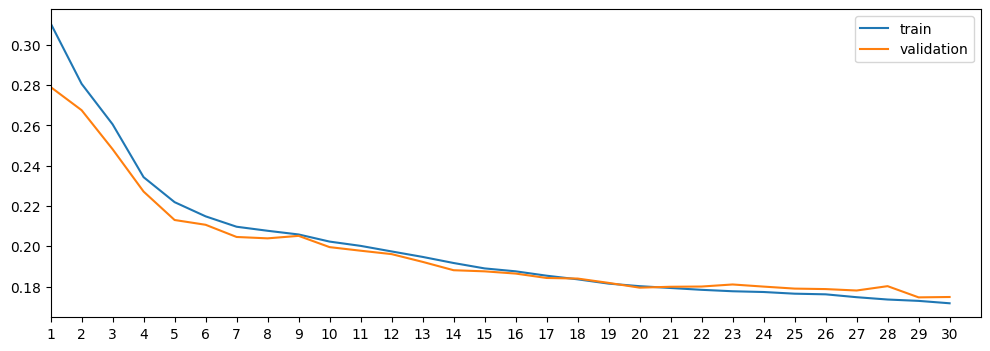

Epoch:30 Training Loss:0.17167966571945448 Validation Loss:0.1747924573775353: 100%|██████████| 30/30 [15:06<00:00, 30.22s/it] 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8980392..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.68639743..0.39246].


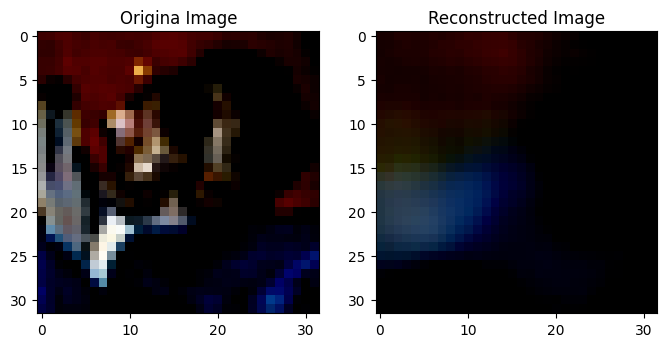

MSE: tensor(0.0622, device='cuda:1')
MAE: tensor(0.1748, device='cuda:1')


In [15]:
model = m.AutoEncoder("5",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(30,optimizer, maeLoss, "./modelos/block5/block5_32x32menys1MAE.pt",train_dl2,test_dl2, model, device)
pipeline.showImages(test_dl2, model,device)
pipeline.calculate_metrics(model, test_dl2,device)

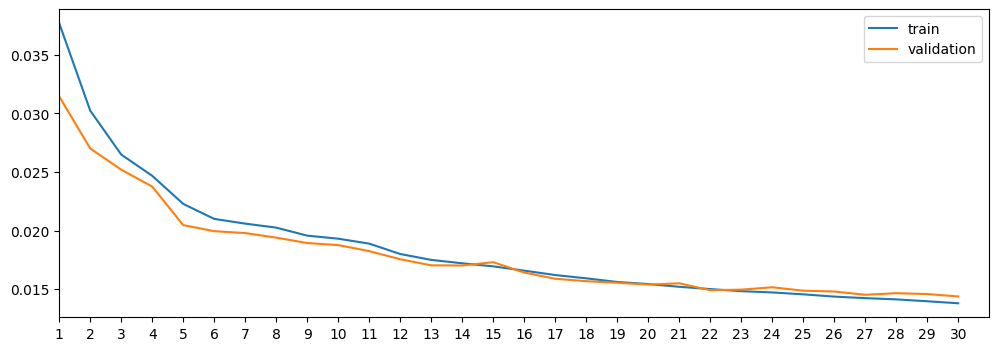

Epoch:30 Training Loss:0.013792438204073413 Validation Loss:0.014376058643949086: 100%|██████████| 30/30 [16:02<00:00, 32.10s/it]


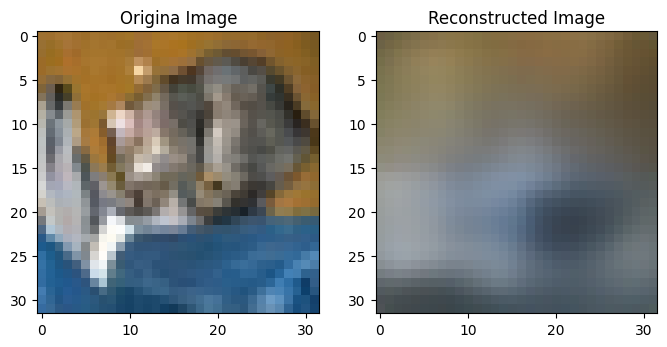

MSE: tensor(0.0144, device='cuda:1')
MAE: tensor(0.0883, device='cuda:1')


In [16]:
model = m.AutoEncoder("5",nn.Sigmoid()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(30,optimizer, mseLoss, "./modelos/block5/block5_32x32Sigmoide.pt",train_dl1,test_dl1, model, device)
pipeline.showImages(test_dl1, model,device)
pipeline.calculate_metrics(model, test_dl1,device)

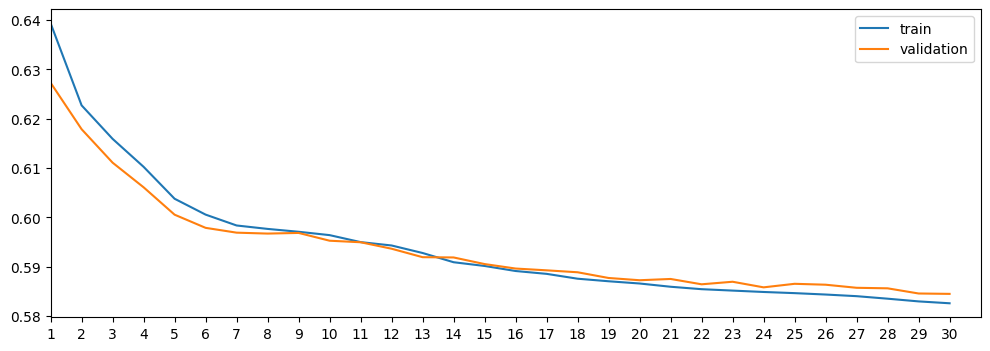

Epoch:30 Training Loss:0.5825811655276825 Validation Loss:0.5844864739828382: 100%|██████████| 30/30 [13:27<00:00, 26.93s/it]


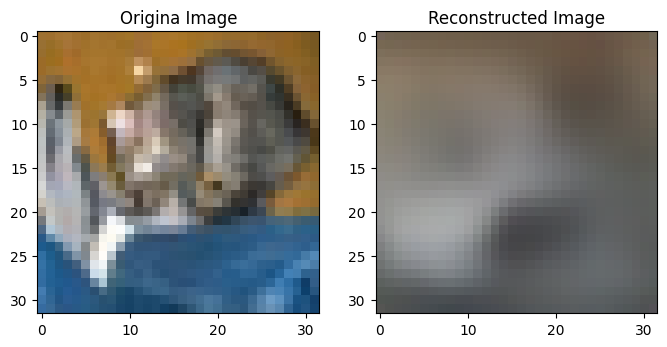

MSE: tensor(0.0148, device='cuda:1')
MAE: tensor(0.0886, device='cuda:1')


In [17]:
model = m.AutoEncoder("5",nn.Sigmoid()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(30,optimizer, bceLoss, "./modelos/block5/block5_32x32SigmoideBCE.pt",train_dl1,test_dl1, model, device)
pipeline.showImages(test_dl1, model,device)
pipeline.calculate_metrics(model, test_dl1,device)

# BLOQUE 5 - 224X224 SALIDA ENCODER [512, 7, 7]

In [ ]:
model = m.AutoEncoder("5", None).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block5/block5_224x224SIN.pt",train_dl3,test_dl3, model, device)
pipeline.showImages(test_dl3, model,device)
pipeline.calculate_metrics(model, test_dl3,device)

In [ ]:
model = m.AutoEncoder("5",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block5/block5_224x224tanh.pt",train_dl3,test_dl3, model, device)
pipeline.showImages(test_dl3, model,device)
pipeline.calculate_metrics(model, test_dl3,device)

In [ ]:
model = m.AutoEncoder("5",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, maeLoss, "./modelos/block5/block5_224x224tanhMAE.pt",train_dl3,test_dl3, model, device)
pipeline.showImages(test_dl3, model,device)
pipeline.calculate_metrics(model, test_dl3,device)

In [ ]:
model = m.AutoEncoder("5",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block5/block5_224x224menys1.pt",train_dl5,test_dl5, model, device)
pipeline.showImages(test_dl5, model,device)
pipeline.calculate_metrics(model, test_dl5,device)

In [ ]:
model = m.AutoEncoder("5",nn.Tanh()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, maeLoss, "./modelos/block5/block5_224x224menys1MAE.pt",train_dl5,test_dl5, model, device)
pipeline.showImages(test_dl5, model,device)
pipeline.calculate_metrics(model, test_dl5,device)

In [ ]:
model = m.AutoEncoder("5",nn.Sigmoid()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, mseLoss, "./modelos/block5/block5_224x224Sigmoide.pt",train_dl4,test_dl4, model, device)
pipeline.showImages(test_dl4, model,device)
pipeline.calculate_metrics(model, test_dl4,device)

In [ ]:
model = m.AutoEncoder("5",nn.Sigmoid()).to(device)
optimizer = Adam(model.parameters(), lr=1e-4)
pipeline.traintestpipeline(15,optimizer, bceLoss, "./modelos/block5/block5_224x224SigmoideBCE.pt",train_dl4,test_dl4, model, device)
pipeline.showImages(test_dl4, model,device)
pipeline.calculate_metrics(model, test_dl4,device)